# Proyecto: Análisis de Datos - Avance 1

## Universidad San Francisco de Quito

### Integrantes:
- Valentina Benavides
- Alejandro Bolaños
- Leonardo Saltos

#### Fecha de entrega: 
1 de abril

#### NRC: 
2209


#### Importación de librerias necesarias para el proyecto

In [1]:
# Importar pandas para el manejo de datos tabulares
import pandas as pd
# Importar chardet para detectar automáticamente la codificación de archivos de texto
import chardet
# Importar seaborn para la visualización de datos estadísticos
import seaborn as sns
# Importar matplotlib.pyplot para la visualización de gráficos
import matplotlib.pyplot as plt
# Importar numpy para operaciones numéricas eficientes
import numpy as np
# Importar LinearRegression de sklearn para modelado de regresión lineal
from sklearn.linear_model import LinearRegression
# Importar OneHotEncoder de sklearn para codificación de variables categóricas
from sklearn.preprocessing import OneHotEncoder
# Importar ColumnTransformer de sklearn para transformaciones específicas por columna
from sklearn.compose import ColumnTransformer
# Importar SimpleImputer de sklearn para imputación de valores faltantes
from sklearn.impute import SimpleImputer
# Importar train_test_split de sklearn para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Importar Regresión Logística de sklearn para correr los modelos
from sklearn.linear_model import LogisticRegression
# Importar metrics de sklearn para tener una puntuación de los modelos
from sklearn.metrics import accuracy_score
# Importar NearMiss de imblearn para técnicas de submuestreo
from imblearn.under_sampling import NearMiss
# Importar SMOTE de imblearn para técnicas de sobremuestreo
from imblearn.over_sampling import SMOTE
# Importar scipy.stats para trabajar estadísticamente 
from scipy.stats import ttest_ind


#### Importación de los datos 

In [2]:
# Función para detectar la codificación del archivo
def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())  # Detectar la codificación
        encoding = result['encoding']       # Obtener la codificación 
    return encoding

# Obtener la codificación del archivo CSV
encoding = detect_encoding('PublicHospitalDataset.csv')

# Leer el archivo CSV con la codificación detectada
df_hospital = pd.read_csv('PublicHospitalDataset.csv', encoding=encoding)

# Mostrar el DataFrame
df_hospital

,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Income,Children,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,725445.0,3,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,235422.0,0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,278207.0,3,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,22613.0,1,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,48161.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,37325.0,2,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,56478.0,0,0
5109,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,Female,44.0,77772.0,0,0
5110,1,No,Yes,children,Urban,90.51,31.0,formerly smoked,Female,33.0,18883.0,3,0


#### Conocer el tamaño del df, tipos de datos, y conocer los datos unicos de cada columna  

In [3]:
df_hospital.describe()

,Hypertension,Avg_glucose_level,Bmi,Age,Income,Children,Stroke
count,5112.000000,5112.000000,4911.000000,5112.000000,5085.000000,5112.000000,5112.000000
mean,0.097613,106.141563,61.449277,43.222809,117056.740216,1.263693,0.048709
std,0.296820,45.275754,1140.430359,22.609043,87105.782585,1.186283,0.215280
min,0.000000,55.120000,10.300000,0.080000,0.000000,0.000000,0.000000
25%,0.000000,77.255000,23.500000,25.000000,44133.000000,0.000000,0.000000
50%,0.000000,91.865000,28.100000,45.000000,101997.000000,1.000000,0.000000
75%,0.000000,114.090000,33.100000,61.000000,183402.000000,2.000000,0.000000
max,1.000000,271.740000,40000.000000,82.000000,849615.000000,7.000000,1.000000


In [4]:
# Tamaño de la base de datos 
df_hospital.shape

(5112, 13)

In [5]:
# Revisar los tipos de datos de las columnas del dataframe
print(df_hospital.dtypes)

Hypertension           int64
Heart Disease         object
Married               object
Work                  object
Residence             object
Avg_glucose_level    float64
Bmi                  float64
Smoking               object
Gender                object
Age                  float64
Income               float64
Children               int64
Stroke                 int64
dtype: object


In [6]:
# Revisamos los valores unicos de cada columna para poder tomar decisiones en base a los datos que las tablas nos presentan
print("Hypertension:", df_hospital['Hypertension'].unique(), "\n")
print("Heart Disease:", df_hospital['Heart Disease'].unique(), "\n")
print("Married:", df_hospital['Married'].unique(), "\n")
print("Work:", df_hospital['Work'].unique(), "\n")
print("Residence:", df_hospital['Residence'].unique(), "\n")
print("Avg_glucose_level:", df_hospital['Avg_glucose_level'].unique(), "\n")
print("Bmi:", df_hospital['Bmi'].unique(), "\n")
print("Smoking:", df_hospital['Smoking'].unique(), "\n")
print("Gender:", df_hospital['Gender'].unique(), "\n")
print("Age:", df_hospital['Age'].unique(), "\n")
print("Income:", df_hospital['Income'].unique(), "\n")
print("Children:", df_hospital['Children'].unique(), "\n")
print("Stroke:", df_hospital['Stroke'].unique(), "\n")


Hypertension: [0 1] 

Heart Disease: ['1' '0' 'No'] 

Married: ['Yes' 'No'] 

Work: ['Private' 'Self-employed' 'k–sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf'] 

Residence: ['Urban' 'Rural'] 

Avg_glucose_level: [228.69 202.21 105.92 ... 166.29  85.28  90.53] 

Bmi: [3.66e+01      nan 3.25e+01 3.44e+01 2.40e+01 2.90e+01 2.74e+01 2.28e+01
 2.42e+01 2.97e+01 3.68e+01 2.73e+01 2.82e+01 3.09e+01 3.75e+01 2.58e+01
 3.78e+01 2.24e+01 4.89e+01 2.66e+01 2.72e+01 2.35e+01 2.83e+01 4.42e+01
 2.54e+01 2.22e+01 3.05e+01 2.65e+01 3.37e+01 2.31e+01 3.20e+01 2.99e+01
 2.39e+01 2.85e+01 2.64e+01 2.02e+01 3.36e+01 3.86e+01 3.92e+01 2.77e+01
 3.14e+01 3.65e+01 3.32e+01 3.28e+01 4.04e+01 2.53e+01 3.02e+01 4.75e+01
 2.03e+01 3.00e+01 2.89e+01 2.81e+01 3.11e+01 2.17e+01 2.70e+01 2.41e+01
 4.59e+01 4.41e+01 2.29e+01 2.91e+01 3.23e+01 4.11e+01 2.56e+01 2.98e+01
 2.63e+01 2.62e+01 2.94e+01 2.44e+01 2.80e+01 2.88e+01 3.46e+01 1.94e+01
 3.03e+01 4.15e+01 2.26e+01 5.66e+01 2.71e+01 3.1

##### Se necesita que los datos sean estructurados de esta forma:

| Variable          | Descripción                                    |
|-------------------|------------------------------------------------|
| Hypertension      | 1: Paciente tiene hipertensión                |
|                   | 0: Paciente no tiene hipertensión             |
| Heart Disease     | 1: Paciente tiene enfermedad cardiaca          |
|                   | 0: Paciente no tiene enfermedad cardiaca       |
| Married           | Yes: Paciente se ha casado                     |
|                   | No: Paciente no se ha casado                   |
| Work              | Children: Cuida niños                          |
|                   | Govt_jov: Trabaja en el gobierno              |
|                   | Never_worked: Nunca ha trabajado               |
|                   | Private: Trabaja en el sector privado          |
|                   | Self-employed: Trabajador por cuenta propia    |
| Residence         | Rural: Vive en área rural                      |
|                   | Urban: Vive en área urbana                      |
| Avg_glucose_level | Nivel de glucose promedio                      |
| Bmi               | Body mass index                                |
| Smoking           | Formerly smoked, never smoked, smokes, Unknown |
| Gender            | Male, Female, Other                            |
| Age               | Edad del paciente                              |
| Income            | Ingreso anual                                  |
| Children          | Número de hijos                                |
| Stroke            | 1: Paciente ha tendio ataque cerebral          |
|                   | 0: Paciente no ha tenido ataque cerebral      |


#### Columna "Hypertension"

In [7]:
# Verificar si hay valores NaN en la columna 'Hypertension'
if df_hospital['Hypertension'].isna().any():
    print("Se encontraron valores NaN en la columna 'Hypertension'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Hypertension'.","\n")

# Verificar si hay valores vacíos en la columna 'Hypertension'
if (df_hospital['Hypertension'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Hypertension'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Hypertension'.","\n")
    
# Convertir la columna 'Hypertension' a tipo de dato categórico
df_hospital['Hypertension'] = df_hospital['Hypertension'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Hypertension' 
print("Hypertension unique values:", df_hospital['Hypertension'].unique())
print("Hypertension data type:", df_hospital['Hypertension'].dtype)

No se encontraron valores NaN en la columna 'Hypertension'. 

No se encontraron valores vacíos en la columna 'Hypertension'. 

Hypertension unique values: [0, 1]
Categories (2, int64): [0, 1]
Hypertension data type: category


#### Columna "Heart Disease"

In [8]:
# Columna Heart Disease, se tiene un No, que de acuerdo a la descripción de la tabla se considera que el paciente no tiene enfermedad cardiaca, por lo tanto se le asigna un valor de 0 

# Verificar si hay valores NaN en la columna 'Heart Disease'
if df_hospital['Heart Disease'].isna().any():
    print("Se encontraron valores NaN en la columna 'Heart Disease'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Heart Disease'.","\n")

# Verificar si hay valores vacíos en la columna 'Heart Disease'
if (df_hospital['Heart Disease'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Heart Disease'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Heart Disease'.","\n")

# Convertir la columna 'Heart Disease' a tipo de dato categórico
df_hospital['Heart Disease'] = df_hospital['Heart Disease'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Heart Disease' después de la conversión
print("Heart Disease unique values:", df_hospital['Heart Disease'].unique())
print("Heart Disease data type:", df_hospital['Heart Disease'].dtype)



No se encontraron valores NaN en la columna 'Heart Disease'. 

No se encontraron valores vacíos en la columna 'Heart Disease'. 

Heart Disease unique values: ['1', '0', 'No']
Categories (3, object): ['0', '1', 'No']
Heart Disease data type: category


In [9]:
# Es necesario transformar el valor de 0 a no según la codificación de la columna 
# Reemplazar 'No' con '0' en la columna 'Heart Disease'
df_hospital['Heart Disease'] = df_hospital['Heart Disease'].replace({'No': '0'})

# Convertir la columna 'Heart Disease' a tipo de dato categórico
df_hospital['Heart Disease'] = df_hospital['Heart Disease'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Heart Disease' después de la conversión
print("Heart Disease unique values:", df_hospital['Heart Disease'].unique())
print("Heart Disease data type:", df_hospital['Heart Disease'].dtype)


Heart Disease unique values: ['1', '0']
Categories (2, object): ['0', '1']
Heart Disease data type: category


#### Columna "Married"

In [10]:
# Verificar si hay valores NaN en la columna 'Married'
if df_hospital['Married'].isna().any():
    print("Se encontraron valores NaN en la columna 'Married'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Married'.","\n")

# Verificar si hay valores vacíos en la columna 'Married'
if (df_hospital['Married'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Married'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Married'.","\n")

# Convertir la columna 'Married' a tipo de dato categórico
df_hospital['Married'] = df_hospital['Married'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Married' después de la conversión
print("Married unique values:", df_hospital['Married'].unique())
print("Married data type:", df_hospital['Married'].dtype)


No se encontraron valores NaN en la columna 'Married'. 

No se encontraron valores vacíos en la columna 'Married'. 

Married unique values: ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
Married data type: category


#### Columna "Work" 

In [11]:
# Coocemos los valores que poblan la columna
print("Work:", df_hospital['Work'].unique(), "\n")

Work: ['Private' 'Self-employed' 'k–sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf'] 



In [12]:
# Contar el número de registros que no son iguales a los posibles valores especificados en la descripción de las variables
registros_no_iguales = df_hospital[~df_hospital['Work'].isin(['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed',])]['Work'].count()

# Imprimir el número de registros que no son iguales a los posibles valores especificados
print("Número de registros en la columna 'Work' que no son iguales a los posibles valores especificados:", registros_no_iguales)


Número de registros en la columna 'Work' que no son iguales a los posibles valores especificados: 10


In [13]:
# Transformar los valores que no son correctos ni coherentes 

# Definir los valores válidos esperados en la columna 'Work'
valores_esperados = ['Private', 'Self-employed', 'Govt_job', 'Never_worked', 'children']

# Utilizar la función apply con una expresión lambda (función anonima) para actualizar los valores
df_hospital['Work'] = df_hospital['Work'].apply(lambda x: x if x in valores_esperados else 'Otros')

# Verificar, muestra los valores únicos de la columna 'Work' después de la actualización
print(df_hospital['Work'].unique())

['Private' 'Self-employed' 'Otros' 'Govt_job' 'children' 'Never_worked']


In [14]:
# Comprobar que ahora todos los datos sean correctos
registros_no_iguales = df_hospital[~df_hospital['Work'].isin(valores_esperados + ['Otros'])]['Work'].count()

# Imprimir el número de registros que no son iguales a los posibles valores especificados
print("Número de registros en la columna 'Work' que no son iguales a los posibles valores especificados:", registros_no_iguales)

Número de registros en la columna 'Work' que no son iguales a los posibles valores especificados: 0


In [15]:
# Verificar el tipo de dato de la columna después de todos los cambios aplicados
print("Work:", df_hospital['Work'].dtype)

Work: object


#### Columna "Residence"

In [16]:
# Verificar si hay valores NaN en la columna 'Residence'
if df_hospital['Residence'].isna().any():
    print("Se encontraron valores NaN en la columna 'Residence'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Residence'.","\n")

# Verificar si hay valores vacíos en la columna 'Residence'
if (df_hospital['Residence'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Residence'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Residence'.","\n")

# Convertir la columna 'Residence' a tipo de dato categórico
df_hospital['Residence'] = df_hospital['Residence'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Residence' después de la transformación 
print("Residence unique values:", df_hospital['Residence'].unique())
print("Residence data type:", df_hospital['Residence'].dtype)


No se encontraron valores NaN en la columna 'Residence'. 

No se encontraron valores vacíos en la columna 'Residence'. 

Residence unique values: ['Urban', 'Rural']
Categories (2, object): ['Rural', 'Urban']
Residence data type: category


#### Columna "AVG_glucose"

In [17]:
# Revisar si existen datos que sean negativos e imposibles para estas mediciones en 'Avg_glucose_level'

# Verificar si hay valores negativos en la columna 'Avg_glucose_level'
valores_anormales_glucosa = df_hospital[df_hospital['Avg_glucose_level'] < 0]

# Mostrar los valores anormales de glucosa, si los hay
if not valores_anormales_glucosa.empty:
    print("Se encontraron valores negativos en la columna 'Avg_glucose_level':")
    print(valores_anormales_glucosa)
else:
    print("No se encontraron valores anormales en la columna 'Avg_glucose_level'.")

# Contar el número de valores NaN en la columna 'Avg_glucose_level'
num_nan_avg = df_hospital['Avg_glucose_level'].isna().sum()

# Imprimir el número de valores NaN en la columna 'Avg_glucose_level'
print("Número de valores NaN en la columna 'Avg_glucose_level':", num_nan_avg, "\n")

# La columna 'Avg_glucose_level' se encuentra con el tipo de dato adecuado para el tipo de dato, debido a que se permiten valores decimales
print("Avg_glucose_level:", df_hospital['Avg_glucose_level'].dtype, "\n")

No se encontraron valores anormales en la columna 'Avg_glucose_level'.
Número de valores NaN en la columna 'Avg_glucose_level': 0 

Avg_glucose_level: float64 



#### Columna "Smoking"

In [18]:
# Verificar si hay valores NaN en la columna 'Smoking'
if df_hospital['Smoking'].isna().any():
    print("Se encontraron valores NaN en la columna 'Smoking'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Smoking'.","\n")

# Verificar si hay valores vacíos en la columna 'Smoking'
if (df_hospital['Smoking'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Smoking'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Smoking'.","\n")

# Imprimir los valores unicos de la columna 
print("Smoking:", df_hospital['Smoking'].unique(), "\n")

No se encontraron valores NaN en la columna 'Smoking'. 

No se encontraron valores vacíos en la columna 'Smoking'. 

Smoking: ['formerly smoked' 'never smoked' 'smokes' 'Unknown' 'weed'] 



In [19]:
# Contar el número de registros por categoría en la columna 'Smoking'
conteo_smoking = df_hospital['Smoking'].value_counts()

# Imprimir el número de registros que son 'weed' para saber cuantos registros debemos realizar una transformación
print("Número de registros 'weed' en la columna 'Smoking':", conteo_smoking.get('weed', 0))

Número de registros 'weed' en la columna 'Smoking': 1


In [20]:
# Eliminar el registro que no corresponde a la categoria del estudio

df_hospital = df_hospital[df_hospital['Smoking'] != 'weed']
print("Smoking unique values:", df_hospital['Smoking'].unique(),"\n")

Smoking unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown'] 



In [21]:
# Definir el orden de las categorías correctamente
orden_categorias = ['Unknown', 'never smoked', 'formerly smoked', 'smokes']

# Convertir la columna 'Smoking' a tipo de dato categórico ordinal con el  orden
df_hospital['Smoking'] = pd.Categorical(df_hospital['Smoking'], categories=orden_categorias, ordered=True)

# Verificar los valores únicos y el tipo de datos de la columna 'Smoking' después de la conversión
print("Smoking unique values:", df_hospital['Smoking'].unique(),"\n")
print("Smoking data type:", df_hospital['Smoking'].dtype)


Smoking unique values: ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
Categories (4, object): ['Unknown' < 'never smoked' < 'formerly smoked' < 'smokes'] 

Smoking data type: category


C:\Users\aleja\AppData\Local\Temp\ipykernel_17040\1652604264.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital['Smoking'] = pd.Categorical(df_hospital['Smoking'], categories=orden_categorias, ordered=True)


#### Columna "Gender"

In [22]:
# Verificar si hay valores NaN en la columna 'Gender'
if df_hospital['Gender'].isna().any():
    print("Se encontraron valores NaN en la columna 'Gender'.","\n")
else:
    print("No se encontraron valores NaN en la columna 'Gender'.","\n")

# Verificar si hay valores vacíos en la columna 'Gender'
if (df_hospital['Gender'] == '').any():
    print("Se encontraron valores vacíos en la columna 'Gender'.","\n")
else:
    print("No se encontraron valores vacíos en la columna 'Gender'.","\n")

# Convertir la columna 'Gender' a tipo de dato categórico
df_hospital['Gender'] = df_hospital['Gender'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Gender' después de la conversión
print("Gender unique values:", df_hospital['Gender'].unique(),"\n")
print("Gender data type:", df_hospital['Gender'].dtype)


No se encontraron valores NaN en la columna 'Gender'. 

No se encontraron valores vacíos en la columna 'Gender'. 

Gender unique values: ['Male', 'Female', 'Other']
Categories (3, object): ['Female', 'Male', 'Other'] 

Gender data type: category


C:\Users\aleja\AppData\Local\Temp\ipykernel_17040\2455216228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital['Gender'] = df_hospital['Gender'].astype('category')


#### Columna "Age"

In [23]:
# Verificar si hay valores negativos en la columna 'Age'
valores_anormales = df_hospital[df_hospital['Age'] < 0]

# Mostrar si hay valores vacios
if not valores_anormales.empty:
    print("Se encontraron valores vacios en la columna 'Age':")
    print(valores_anormales)
else:
    print("No se encontraron valores vacios en la columna 'Age'.")
    
# Verificar si hay valores NaN en la columna 'Age'
if df_hospital['Age'].isna().any():
    print("Se encontraron valores NaN en la columna 'Age'.")
    num_nan_age = df_hospital['Age'].isna().sum()
    print("Número de valores NaN en la columna 'Age':", num_nan_age)
else:
    print("No se encontraron valores NaN en la columna 'Age'.","\n")

# Tipo de dato de la columna
print("Age:", df_hospital['Age'].dtype,"\n")

No se encontraron valores vacios en la columna 'Age'.
No se encontraron valores NaN en la columna 'Age'. 

Age: float64 



#### Columna "Income"

In [24]:
# Verificar si hay valores negativos en la columna 'Income'
valores_negativos_income = df_hospital[df_hospital['Income'] < 0]

# Mostrar los valores vacios en la columna 'Income', si los hay
if not valores_negativos_income.empty:
    print("Se encontraron valores vacios en la columna 'Income':","\n")
    print(valores_negativos_income)
else:
    print("No se encontraron valores vacios en la columna 'Income'.","\n")
    
# Verificar si hay valores NaN en la columna 'Income'
if df_hospital['Income'].isna().any():
    print("Se encontraron valores NaN en la columna 'Income'.","\n")
    num_nan_income = df_hospital['Income'].isna().sum()
    print("Número de valores NaN en la columna 'Income':", num_nan_income,"\n")
else:
    print("No se encontraron valores NaN en la columna 'Income'.","\n")

# Verificar si hay valores iguales a cero en la columna 'Income'
if (df_hospital['Income'] == 0).any():
    print("Se encontraron valores iguales a cero en la columna 'Income'.","\n")
    num_zeros_income = (df_hospital['Income'] == 0).sum()
    print("Número de valores iguales a cero en la columna 'Income':", num_zeros_income,"\n")
else:
    print("No se encontraron valores iguales a cero en la columna 'Income'.","\n")

    
# Al ser el income un valor que pueda tomar decimales el tipo de dato float es correcto
print("Income:", df_hospital['Income'].dtype,"\n")


No se encontraron valores vacios en la columna 'Income'. 

Se encontraron valores NaN en la columna 'Income'. 

Número de valores NaN en la columna 'Income': 27 

Se encontraron valores iguales a cero en la columna 'Income'. 

Número de valores iguales a cero en la columna 'Income': 24 

Income: float64 



In [25]:
# En esta caso se acepta los valores iguales a 0  por lo que podria no tener empleo 

# Eliminar los valores Nan 

# Eliminar filas donde la columna 'Income' tenga valores NaN
df_hospital.dropna(subset=['Income'], inplace=True)

# Contar y verificar cuántos valores NaN quedan en la columna 'Bmi' después de eliminar las filas con NaN
num_nan_income_despues = df_hospital['Income'].isna().sum()

# Imprimir el número de valores NaN en la columna 'Bmi' después del cambio
print("Número de valores NaN en la columna 'Bmi' después de eliminar filas con NaN:", num_nan_income_despues)

Número de valores NaN en la columna 'Bmi' después de eliminar filas con NaN: 0


C:\Users\aleja\AppData\Local\Temp\ipykernel_17040\3168739872.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital.dropna(subset=['Income'], inplace=True)


#### Columna "Children" 

In [26]:
# Verificar si hay valores negativos en la columna 'Children'
valores_negativos_children = df_hospital[df_hospital['Children'] < 0]

# Mostrar los valores negativos en la columna 'Children', si los hay
if not valores_negativos_children.empty:
    print("Se encontraron valores negativos en la columna 'Children':")
    print(valores_negativos_children)
else:
    print("No se encontraron valores negativos en la columna 'Children'.", "\n")
    
# Verificar si hay valores NaN en la columna 'Children'
if df_hospital['Children'].isna().any():
    print("Se encontraron valores NaN en la columna 'Children'.")
    num_nan_children = df_hospital['Children'].isna().sum()
    print("Número de valores NaN en la columna 'Children':", num_nan_children)
else:
    print("No se encontraron valores NaN en la columna 'Children'.","\n")
    
# Al ser entero el tipo de dato no se debe revisar si hay valores decimales 

# Al cumplir ambos criterios la columna children es correcta y al ser entero cumple con los criterios
print("Children:", df_hospital['Children'].dtype,"\n")

No se encontraron valores negativos en la columna 'Children'. 

No se encontraron valores NaN en la columna 'Children'. 

Children: int64 



#### Columna "BMI"

In [27]:
# Verificar el tipo de dato de la columna 'Bmi'
print("Bmi:", df_hospital['Bmi'].dtype, "\n")

# Revisar si existen datos negativos o iguales a 0 que sean imposibles para estas mediciones

# Verificar si hay valores negativos en la columna 'Bmi'
valores_anormales_bmi = df_hospital[df_hospital['Bmi'] < 0]

# Mostrar los valores anormales de BMI, si los hay
if not valores_anormales_bmi.empty:
    print("Se encontraron valores anormales (negativos) en la columna 'Bmi':")
    print(valores_anormales_bmi)
else:
    print("No se encontraron valores anormales (negativos) en la columna 'Bmi'.")

# Verificar si hay valores en la columna 'Bmi' iguales a 0
valores_cero_bmi = df_hospital[df_hospital['Bmi'] == 0]

# Mostrar los valores iguales a 0 en BMI, si los hay
if not valores_cero_bmi.empty:
    print("\nSe encontraron valores iguales a 0 en la columna 'Bmi':")
    print(valores_cero_bmi)
else:
    print("\nNo se encontraron valores iguales a 0 en la columna 'Bmi'.")

# Contar el número de valores NaN en la columna 'Bmi'
num_nan_bmi = df_hospital['Bmi'].isna().sum()

# Imprimir el número de valores NaN en la columna 'Bmi'
print("\nNúmero de valores NaN en la columna 'Bmi':", num_nan_bmi)

Bmi: float64 

No se encontraron valores anormales (negativos) en la columna 'Bmi'.

No se encontraron valores iguales a 0 en la columna 'Bmi'.

Número de valores NaN en la columna 'Bmi': 201


In [28]:
# Ver estadísticas descriptivas de 'Bmi'
print(df_hospital['Bmi'].describe())

# Calcular la media y la desviación estándar de 'Bmi'
mean = df_hospital['Bmi'].mean()
std_dev = df_hospital['Bmi'].std()

count     4883.000000
mean        61.640938
std       1143.693108
min         10.300000
25%         23.500000
50%         28.100000
75%         33.100000
max      40000.000000
Name: Bmi, dtype: float64


In [29]:
#Pelea, L. P. (2019). Valores atípicos en los datos,¿ cómo identificarlos y manejarlos?. Revista del Jardín Botánico Nacional, 40, 99-107.

# Definir los límites para detectar valores atípicos, usando el metodo de 3 desviaciónes estandar para identificar aquellos que sean atípicos
limites = (mean - 3 * std_dev, mean + 3 * std_dev)

# Identificar los valores atípicos 
outliers_mask = (df_hospital['Bmi'] < limites[0]) | (df_hospital['Bmi'] > limites[1])
outliers = df_hospital.loc[outliers_mask, 'Bmi']

# Imprimir los valores atípicos
print("Valores atípicos en 'Bmi':")
print(outliers)

Valores atípicos en 'Bmi':
4594    40000.0
4661    40000.0
4774    40000.0
4822    40000.0
Name: Bmi, dtype: float64


In [30]:
# Reemplazar esos valores atípicos por NaN utilizando su índice
df_hospital.loc[outliers.index, 'Bmi'] = np.nan

# Verificar cambios
print("Valores reemplazados por NaN en 'Bmi':")
print(df_hospital.loc[outliers.index, 'Bmi'])

# Contar el número de valores NaN en la columna 'Bmi'
num_nan_bmi = df_hospital['Bmi'].isna().sum()
# Imprimir el número de valores NaN en la columna 'Bmi'
print("\nNúmero de valores NaN totales en la columna 'Bmi' después de haber remplazado los datos atípicos por Nan:", num_nan_bmi)

Valores reemplazados por NaN en 'Bmi':
4594   NaN
4661   NaN
4774   NaN
4822   NaN
Name: Bmi, dtype: float64

Número de valores NaN totales en la columna 'Bmi' después de haber remplazado los datos atípicos por Nan: 205


In [31]:
# Remplazar los datos Nan con el método de regresión lineal para datos Nan 

# Datos para entrenar el modelo (sin valores NaN en 'Bmi')
train_data = df_hospital.dropna(subset=['Bmi'])

# Datos para predecir 'Bmi' (solo valores NaN en 'Bmi')
predict_data = df_hospital[df_hospital['Bmi'].isna()]

# Definir la variable predictora y la respuesta
X_train = train_data[['Age', 'Avg_glucose_level', 'Income', 'Children']] 
y_train = train_data['Bmi']

In [32]:
# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Verificar de que las variables predictoras en predict_data no contienen NaN
X_predict = predict_data[['Age', 'Avg_glucose_level', 'Income',  'Children']] .dropna()

# Hacer predicciones
predicted_bmi = model.predict(X_predict)

# Reemplazar los valores NaN en 'Bmi' con las predicciones
df_hospital.loc[df_hospital['Bmi'].isna(), 'Bmi'] = predicted_bmi

In [33]:
r_squared = model.score(X_train, y_train)
print(f"Coeficiente de Determinación (R²): {r_squared}")

Coeficiente de Determinación (R²): 0.13230312033868097


In [34]:
# Comprobar si aún hay NaN en 'Bmi'
print("Número de NaN restantes en 'Bmi':", df_hospital['Bmi'].isna().sum())

Número de NaN restantes en 'Bmi': 0


### Columna "Stroke" (Variable de Respuesta) 

In [35]:
# Al ser la columna stroke de tipo entero esto se debe cambiar ya que debe ser categorica, debido a que si el valor es igual a 1 representa que la persona sufrio un ataque cerebral y 0 que no lo ha tenido.
# Convertir la columna 'Stroke' a tipo de dato categórico
df_hospital['Stroke'] = df_hospital['Stroke'].astype('category')

# Verificar los valores únicos y el tipo de datos de la columna 'Stroke' después de la conversión
print("Stroke unique values:", df_hospital['Stroke'].unique(),"\n")
print("Stroke data type:", df_hospital['Stroke'].dtype)


Stroke unique values: [1, 0]
Categories (2, int64): [0, 1] 

Stroke data type: category


C:\Users\aleja\AppData\Local\Temp\ipykernel_17040\4146849376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hospital['Stroke'] = df_hospital['Stroke'].astype('category')


##  Analice la correlación entre variables predictivas. ¿Cuáles variables parecen afectar a la variable respuesta?

In [36]:
print(df_hospital.dtypes)

Hypertension         category
Heart Disease        category
Married              category
Work                   object
Residence            category
Avg_glucose_level     float64
Bmi                   float64
Smoking              category
Gender               category
Age                   float64
Income                float64
Children                int64
Stroke               category
dtype: object


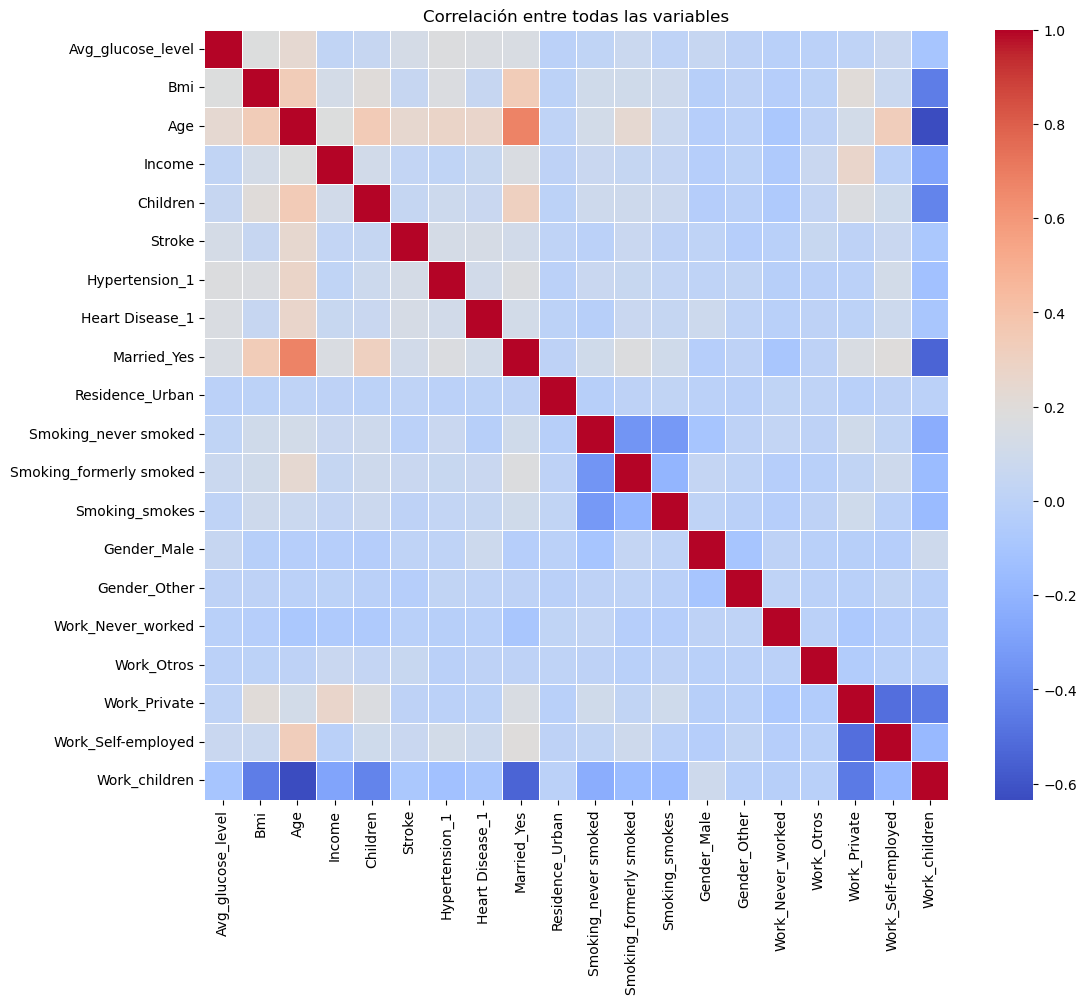

In [37]:
# Aplicar codificación One-Hot a las variables categóricas
df_encoded = pd.get_dummies(df_hospital, columns=['Hypertension', 'Heart Disease', 'Married', 'Residence', 'Smoking', 'Gender', 'Work'], drop_first=True)

# Calcular la matriz de correlación para el DataFrame codificado
correlation_matrix = df_encoded.corr()

# Visualización de la matriz de correlación con un heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title("Correlación entre todas las variables")
plt.show()

In [38]:
print(correlation_matrix)

                         Avg_glucose_level       Bmi       Age    Income  \
Avg_glucose_level                 1.000000  0.183058  0.236676  0.023766   
Bmi                               0.183058  1.000000  0.339427  0.120467   
Age                               0.236676  0.339427  1.000000  0.178671   
Income                            0.023766  0.120467  0.178671  1.000000   
Children                          0.055209  0.201867  0.344855  0.109356   
Stroke                            0.127994  0.053148  0.242607  0.035509   
Hypertension_1                    0.172287  0.167387  0.276639  0.021024   
Heart Disease_1                   0.162636  0.050232  0.264866  0.060634   
Married_Yes                       0.154522  0.341784  0.678941  0.160085   
Residence_Urban                  -0.003620  0.003124  0.014706  0.006174   
Smoking_never smoked              0.023159  0.102351  0.117632  0.066543   
Smoking_formerly smoked           0.068531  0.104960  0.237401  0.043832   
Smoking_smok

###  Visualización de Datos: Visualice todas las variables predictivas y describa su distribución.  Analice la distribución de la variable respuesta

### Columna Hypertension

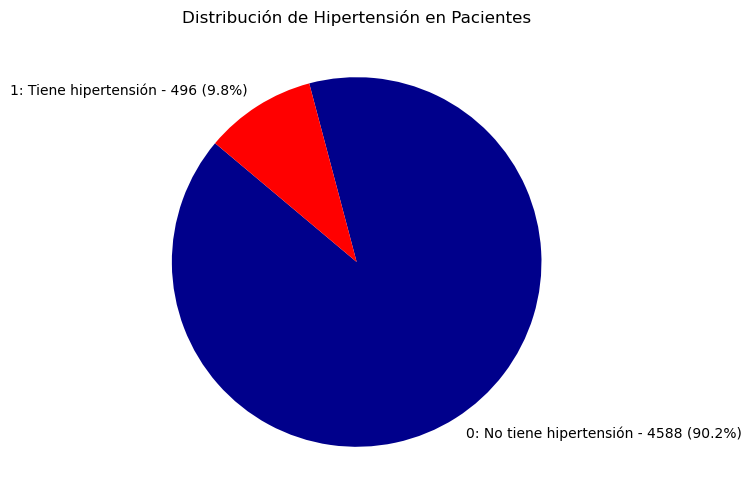

In [39]:
# Contar las frecuencias de los valores en la columna 'Hypertension'
hypertension_counts = df_hospital['Hypertension'].value_counts().sort_index()

# Preparar las etiquetas con porcentajes y cantidades
labels = [f'{index}: {"Tiene hipertensión" if index == 1 else "No tiene hipertensión"} - {value} ({value/sum(hypertension_counts)*100:.1f}%)' for index, value in hypertension_counts.items()]

# Especificar colores personalizados
colors = ['darkblue', 'red']  # Azul para 'No tiene hipertensión' y rojo para 'Tiene hipertensión'

# Crear el diagrama de pie 
plt.figure(figsize=(8, 6))
plt.pie(hypertension_counts, labels=labels, colors=colors, startangle=140)
plt.title('Distribución de Hipertensión en Pacientes')
plt.show()

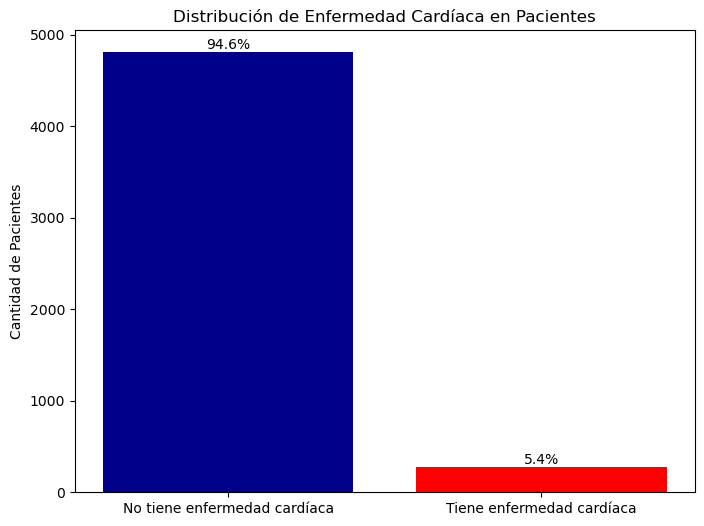

In [40]:
# Contar las frecuencias de los valores en la columna 'Heart Disease'
heart_disease_counts = df_hospital['Heart Disease'].value_counts().sort_index()

# Calcular porcentajes
heart_disease_percentages = (heart_disease_counts / heart_disease_counts.sum()) * 100

# Preparar las etiquetas para el eje X
labels_hd = ['No tiene enfermedad cardíaca', 'Tiene enfermedad cardíaca']

# Colores personalizados para el gráfico
colors_hd = ['darkblue', 'red']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels_hd, heart_disease_counts, color=colors_hd)

# Añadir el porcentaje sobre cada barra
for bar, percentage in zip(bars, heart_disease_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Distribución de Enfermedad Cardíaca en Pacientes')
plt.ylabel('Cantidad de Pacientes')
plt.show()


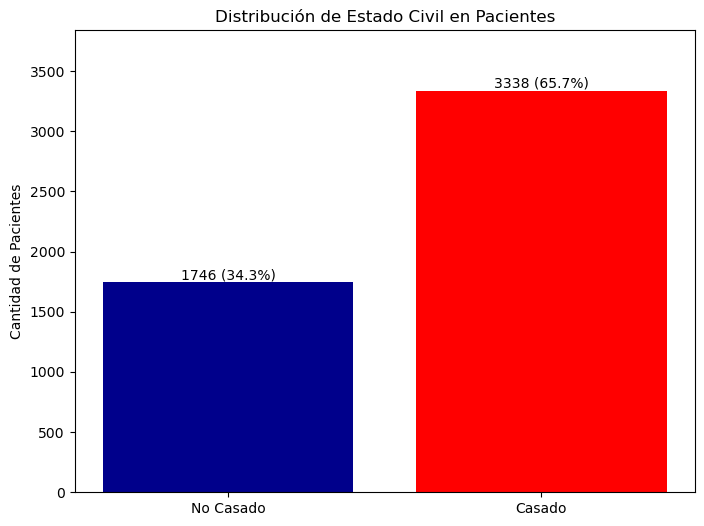

In [41]:
# Contar las frecuencias de los valores en la columna 'Married'
married_counts = df_hospital['Married'].value_counts().sort_index()

# Calcular porcentajes
married_percentages = (married_counts / married_counts.sum()) * 100

# Preparar las etiquetas para el eje X
labels_married = ['No Casado', 'Casado'] 

# Colores personalizados para el gráfico
colors_married = ['darkblue', 'red']

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = plt.bar(labels_married, married_counts, color=colors_married)

# Añadir el valor y porcentaje sobre cada barra
for bar, value, percentage in zip(bars, married_counts, married_percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{value} ({percentage:.1f}%)', ha='center', va='bottom')

plt.title('Distribución de Estado Civil en Pacientes')
plt.ylabel('Cantidad de Pacientes')
plt.ylim(0, max(married_counts) * 1.15)  
plt.show()


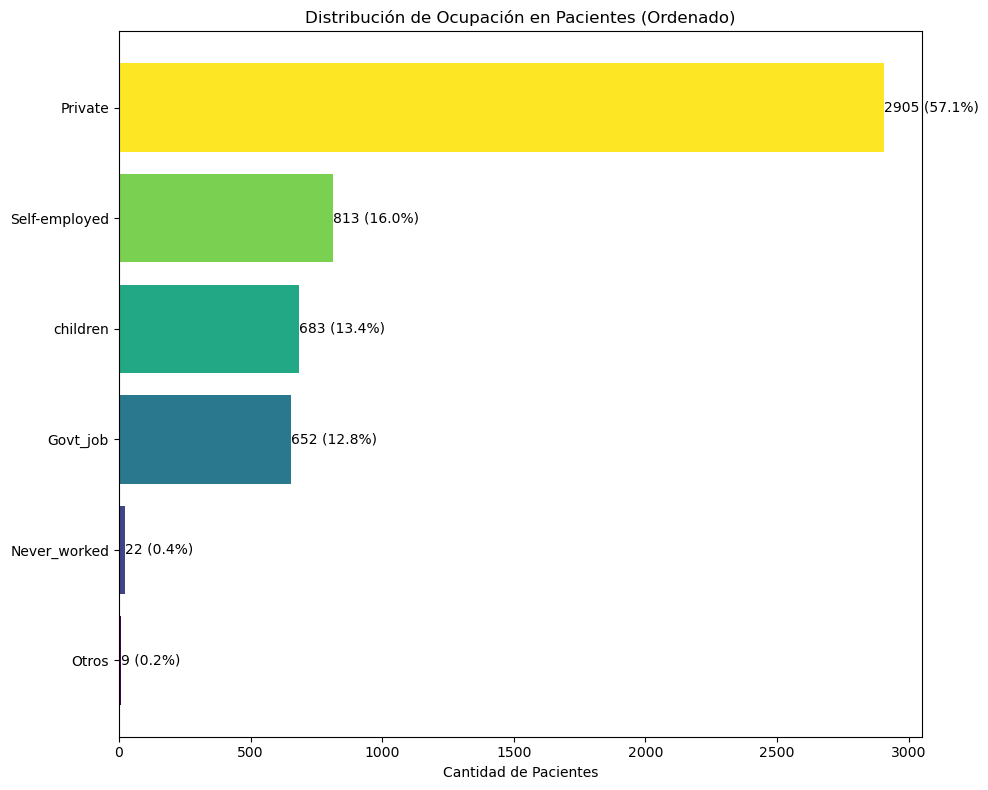

In [42]:
# Asegurarse de que work_counts está ordenado de mayor a menor
work_counts = df_hospital['Work'].value_counts().sort_values(ascending=True)

# Calcular porcentajes
work_percentages = (work_counts / work_counts.sum()) * 100

# Definir una paleta de colores para las diferentes categorías de 'Work'
colors = plt.cm.viridis(np.linspace(0, 1, len(work_counts)))

# Crear el gráfico de barras horizontal ordenado
plt.figure(figsize=(10, 8))
bars = plt.barh(work_counts.index, work_counts, color=colors)

# Añadir el valor y porcentaje al lado de cada barra
for bar, value, percentage in zip(bars, work_counts, work_percentages):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value} ({percentage:.1f}%)', va='center')

plt.title('Distribución de Ocupación en Pacientes (Ordenado)')
plt.xlabel('Cantidad de Pacientes')
plt.tight_layout()
plt.show()

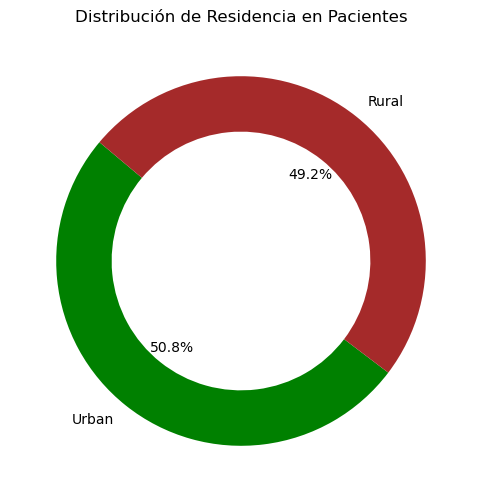

In [43]:
# Contar las frecuencias de los valores en la columna 'Residence'
residence_counts = df_hospital['Residence'].value_counts()

# Especificar los colores personalizados
colors = ['green' if label == 'Urban' else 'brown' for label in residence_counts.index]

# Crear el gráfico de dona
plt.figure(figsize=(8, 6))
plt.pie(residence_counts, labels=residence_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.3))
plt.title('Distribución de Residencia en Pacientes')
plt.show()

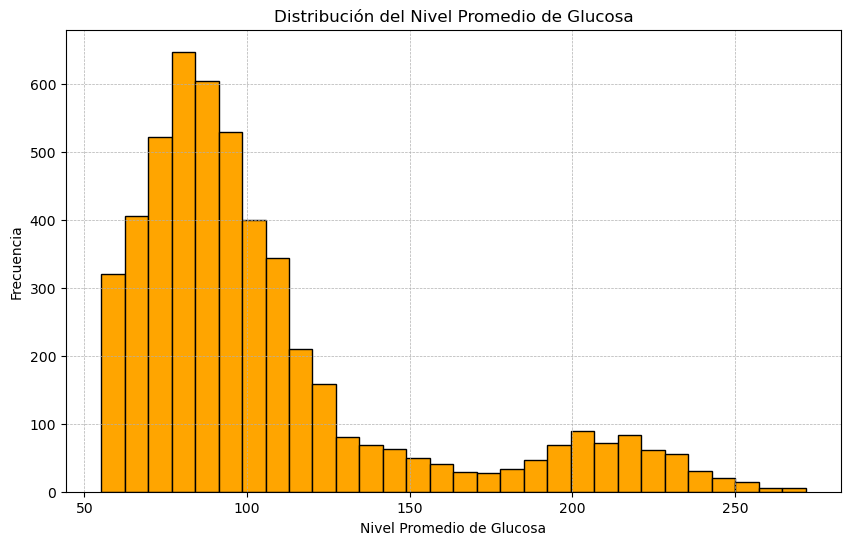

In [44]:
# Histograma para 'Avg_glucose_level'
plt.figure(figsize=(10, 6))
plt.hist(df_hospital['Avg_glucose_level'], bins=30, color='orange', edgecolor='black')
plt.title('Distribución del Nivel Promedio de Glucosa')
plt.xlabel('Nivel Promedio de Glucosa')
plt.ylabel('Frecuencia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

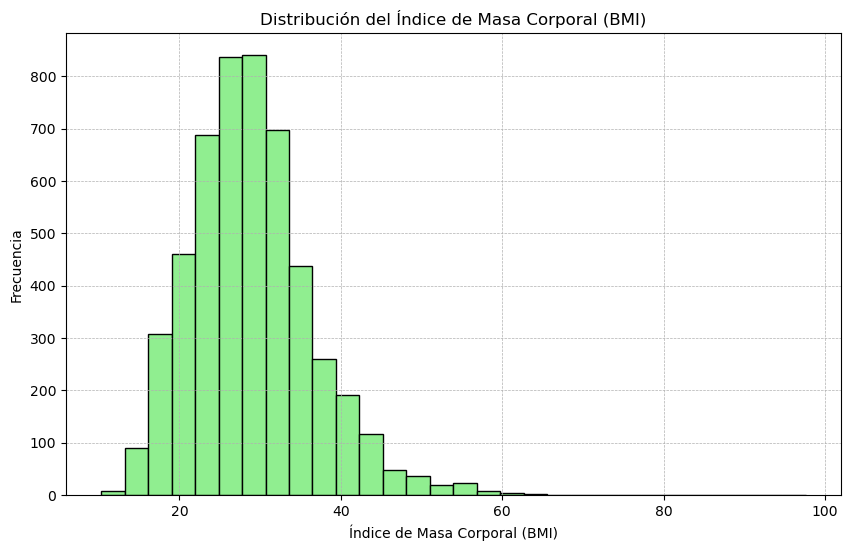

In [45]:
# Especificar el rango de interés para 'Bmi'
rango_bmi = (df_hospital['Bmi'].min(), df_hospital['Bmi'].max())  

# Crear el histograma para 'Bmi' 
plt.figure(figsize=(10, 6))
plt.hist(df_hospital['Bmi'], bins=30, range=rango_bmi, color='lightgreen', edgecolor='black')  
plt.title('Distribución del Índice de Masa Corporal (BMI)')
plt.xlabel('Índice de Masa Corporal (BMI)')
plt.ylabel('Frecuencia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

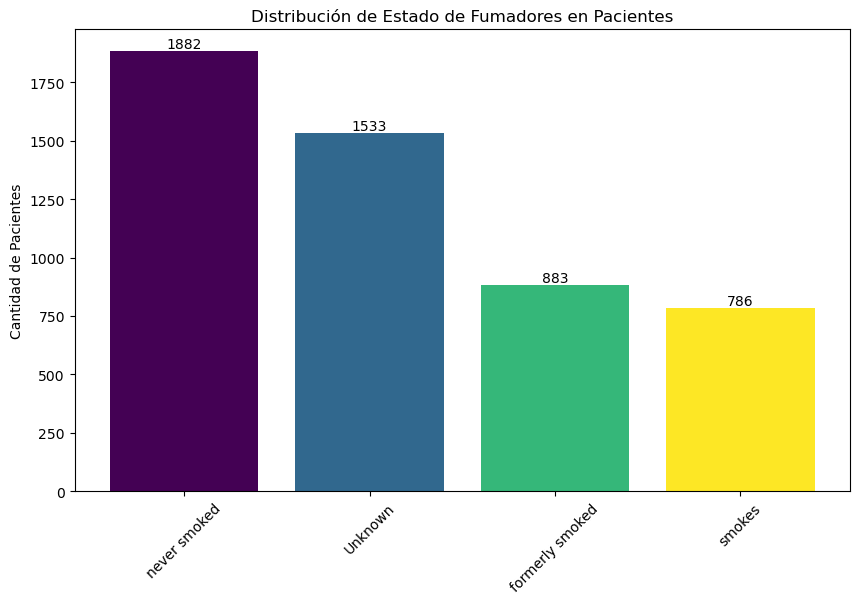

In [46]:
# Contar las frecuencias de los valores en la columna 'Smoking'
smoking_counts = df_hospital['Smoking'].value_counts()

# Ordenar los conteos de mayor a menor para una mejor visualización
smoking_counts_sorted = smoking_counts.sort_values(ascending=False)

# Colores personalizados para cada categoría
colors = plt.cm.viridis(np.linspace(0, 1, len(smoking_counts_sorted)))

# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
bars = plt.bar(smoking_counts_sorted.index, smoking_counts_sorted, color=colors)

# Añadir la cantidad sobre cada barra
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de Estado de Fumadores en Pacientes')
plt.xticks(rotation=45)  # Rotar las etiquetas 
plt.show()

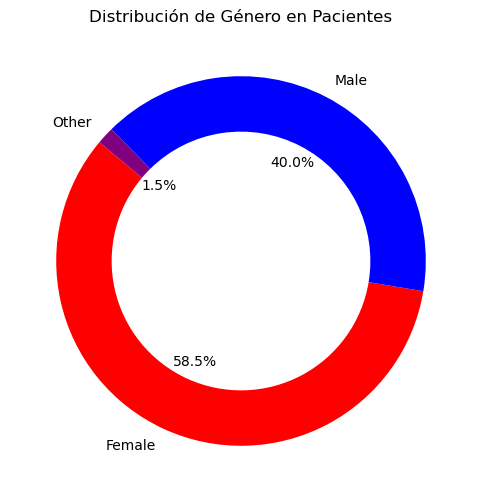

In [47]:
# Contar las frecuencias de los valores en la columna 'Gender'
gender_counts = df_hospital['Gender'].value_counts()

# Especificar colores personalizados para cada género
colors_gender = {'Male': 'blue', 'Female': 'red', 'Other': 'purple'} 

# Crear el gráfico de dona
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=[colors_gender[label] for label in gender_counts.index], wedgeprops=dict(width=0.3))
plt.title('Distribución de Género en Pacientes')
plt.show()

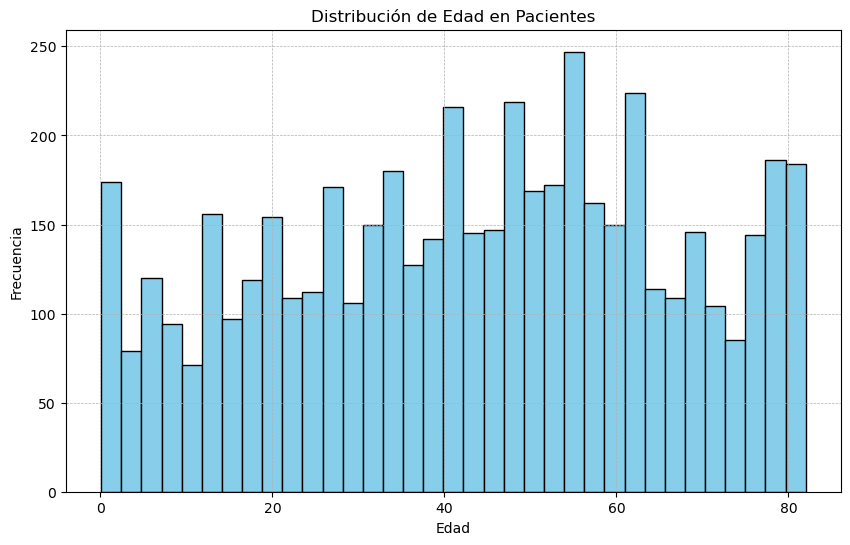

In [48]:
# Crear el histograma para 'Age'
plt.figure(figsize=(10, 6))
plt.hist(df_hospital['Age'], bins=35, color='skyblue', edgecolor='black')
plt.title('Distribución de Edad en Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

C:\Users\aleja\AppData\Local\Temp\ipykernel_17040\3371490161.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_hospital['Income'], shade=True, color="r")


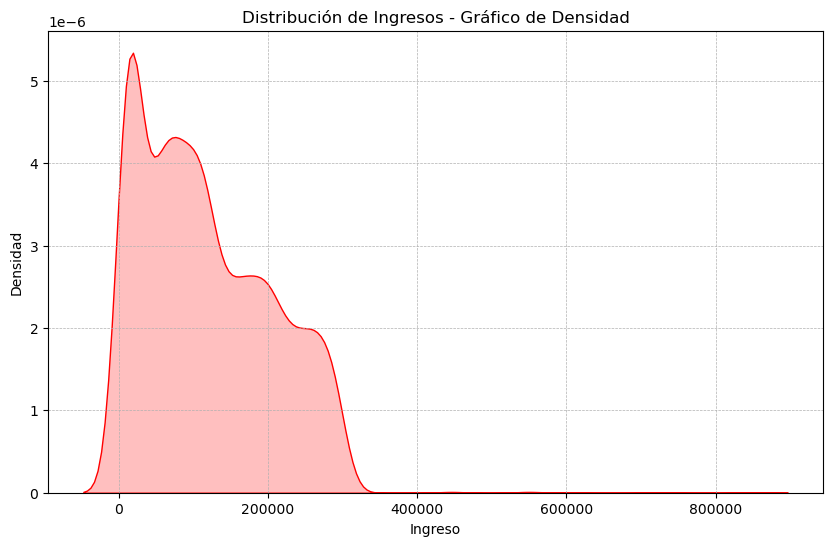

In [49]:
# Gráfico de densidad para conocer la distribución de ingresos de la población del estudio
plt.figure(figsize=(10, 6))
sns.kdeplot(df_hospital['Income'], shade=True, color="r")
plt.title('Distribución de Ingresos - Gráfico de Densidad')
plt.xlabel('Ingreso')
plt.ylabel('Densidad')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

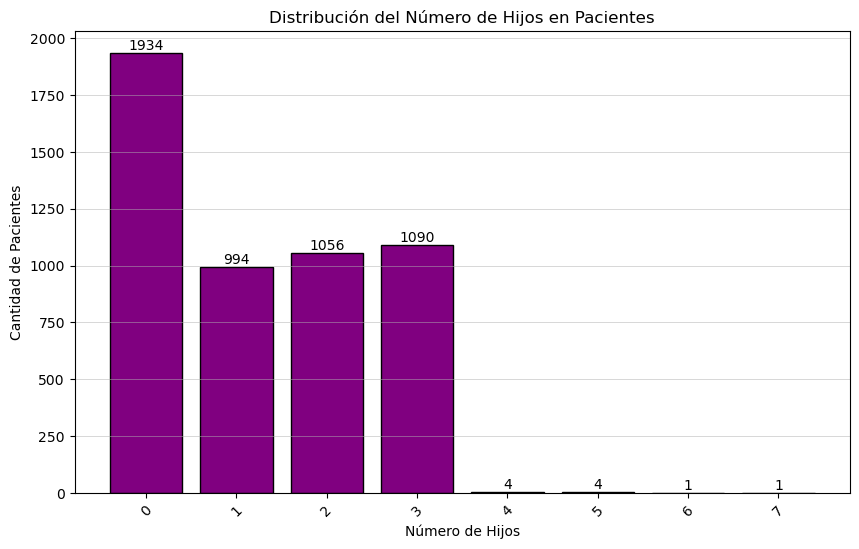

In [50]:
# Grafico de barras para Children 
children_counts_sorted = df_hospital['Children'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(children_counts_sorted.index.astype(str), children_counts_sorted, color='purple', edgecolor='black')

# Añadir el valor de conteo sobre cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{int(yval)}', ha='center', va='bottom')

plt.title('Distribución del Número de Hijos en Pacientes')
plt.xlabel('Número de Hijos')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X para mejorar la legibilidad
plt.grid(axis='y', linestyle='-', linewidth=0.5, alpha=0.7)
plt.show()

### Variable de respuesta

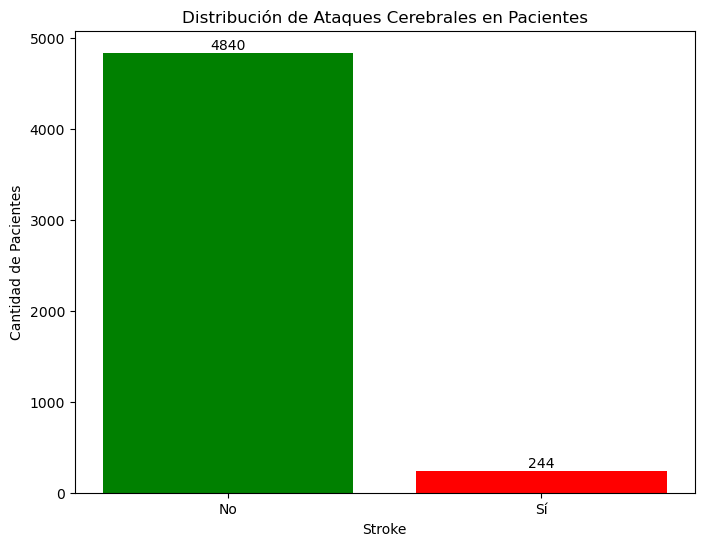

In [51]:
# Contar las frecuencias de los valores en la columna 'Stroke'
stroke_counts = df_hospital['Stroke'].value_counts()

plt.figure(figsize=(8, 6))
bars = plt.bar(stroke_counts.index.astype(str), stroke_counts, color=['green', 'red'])

# Añadir el valor de cada clase sobre las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height}', ha='center', va='bottom')

plt.title('Distribución de Ataques Cerebrales en Pacientes')
plt.xlabel('Stroke')
plt.ylabel('Cantidad de Pacientes')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])  
plt.show()

La base de datos no está balanceada (en inglés conocida como unbalanced dataset). Investigue que es una base de datos no balanceada utilizando fuentes de referencia confiables (libros y 
papers), los problemas con este tipo de base de datos y al menos dos técnicas utilizadas durante el 
entrenamiento del algoritmo para reducir su efecto negativo. 

In [52]:
# Definir características categóricas y numéricas
caracteristicas_categoricas = ['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence', 'Smoking', 'Gender']
caracteristicas_numericas = ['Avg_glucose_level', 'Bmi', 'Age', 'Income', 'Children']

# Crear un transformador para manejar variables categóricas
transformador_categorico = OneHotEncoder()

# Crear un transformador para manejar variables numéricas
transformador_numerico = SimpleImputer(strategy='mean')  

# Combinar transformadores
preprocesador = ColumnTransformer(
    transformers=[
        ('a', transformador_categorico, caracteristicas_categoricas),
        ('num', transformador_numerico, caracteristicas_numericas)
    ])

# Aplicar preprocesamiento  
X = df_hospital.drop('Stroke', axis=1)
y = df_hospital['Stroke']

X_preprocesado = preprocesador.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_preprocesado, y, test_size=0.2, random_state=42)

# Aplicar submuestreo Near Miss
nm = NearMiss()
X_undersampled, y_undersampled = nm.fit_resample(X_entrenamiento, y_entrenamiento)

# Crear un nuevo DataFrame con los datos rebalanceados
columnas = preprocesador.named_transformers_['a'].get_feature_names_out(caracteristicas_categoricas).tolist() + caracteristicas_numericas
df_rebalanceado = pd.DataFrame(X_undersampled, columns=columnas)  # Corrección aquí
df_rebalanceado['Stroke'] = y_undersampled

# Comprobar el nuevo balance de clases
print(df_rebalanceado['Stroke'].value_counts())

Stroke
0    184
1    184
Name: count, dtype: int64


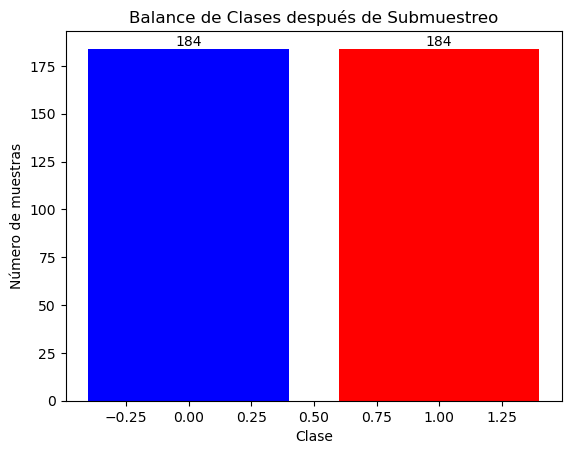

In [53]:
# Datos de la salida del conteo de clases
conteo_clases = df_rebalanceado['Stroke'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_clases.index, conteo_clases.values, color=['blue', 'red'])

# Añadir etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Balance de Clases después de Submuestreo')

# Añadir etiquetas en las barras
for i in range(len(conteo_clases)):
    plt.text(i, conteo_clases.values[i], str(conteo_clases.values[i]), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [54]:
# Seleccionar las características y las etiquetas
X = df_hospital.drop('Stroke', axis=1)
y = df_hospital['Stroke']

# Definir las columnas categóricas que necesitan ser codificadas
categorical_cols = ['Hypertension', 'Heart Disease', 'Married', 'Work', 'Residence', 'Smoking', 'Gender']

# Crear el transformador para aplicar codificación one-hot a las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Aplicar la transformación
X_encoded = preprocessor.fit_transform(X)

# Aplicar SMOTE para generar ejemplos sintéticos y hacer el oversampling
smote = SMOTE()
X_oversampled, y_oversampled = smote.fit_resample(X_encoded, y)

# Crear un nuevo DataFrame con los datos sobremuestreados
df_oversampled = pd.concat([
    pd.DataFrame(X_oversampled, columns=preprocessor.get_feature_names_out()),
    pd.DataFrame(y_oversampled, columns=['Stroke'])
], axis=1)

# Contar el número de muestras para cada clase en el DataFrame sobremuestreado
conteo_clases = df_oversampled['Stroke'].value_counts()
print(conteo_clases)

Stroke
0    4840
1    4840
Name: count, dtype: int64


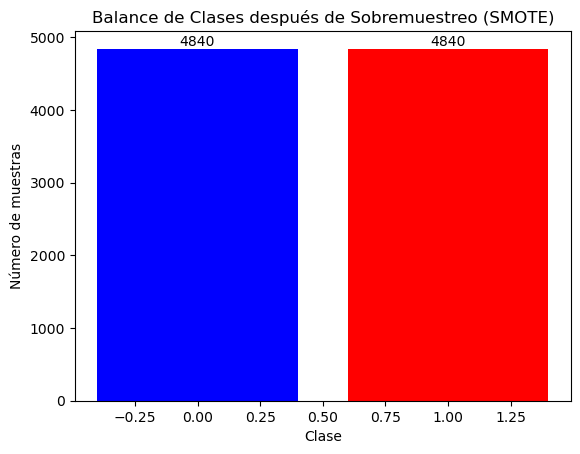

In [55]:
# Datos de la salida del conteo de clases
conteo_clases = df_oversampled['Stroke'].value_counts()

# Crear el gráfico de barras
plt.bar(conteo_clases.index, conteo_clases.values, color=['blue', 'red'])

# Añadir etiquetas y título
plt.xlabel('Clase')
plt.ylabel('Número de muestras')
plt.title('Balance de Clases después de Sobremuestreo (SMOTE)')

# Añadir etiquetas en las barras
for i in range(len(conteo_clases)):
    plt.text(i, conteo_clases.values[i], str(conteo_clases.values[i]), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Divida la base de datos en un set de entrenamiento, un set de validación y un set de prueba. Justifique en base a la literatura el porcentaje de datos que se va a cada set (incluya al menos una referencia de papers o libros sobre este porcentaje, los slides de la clase o blogs de internet no es una referencia válida) 

In [56]:
#Gholamy, A., Kreinovich, V., & Kosheleva, O. (2018). Why 70/30 or 80/20 relation between training and testing sets: A pedagogical explanation. Int. J. Intell. Technol. Appl. Stat, 11(2), 105-111.

# Dividir inicialmente el conjunto de datos en entrenamiento + validación (80%) y prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(df_hospital.drop('Stroke', axis=1), df_hospital['Stroke'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento + validación en entrenamiento (87.5% de 80% = 70% del total) y validación (12.5% de 80% = 10% del total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 es 10% del total, ya que 0.1/0.8 = 0.125

# Imprimir tamaños de los conjuntos
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 3558
Tamaño del conjunto de validación: 509
Tamaño del conjunto de prueba: 1017


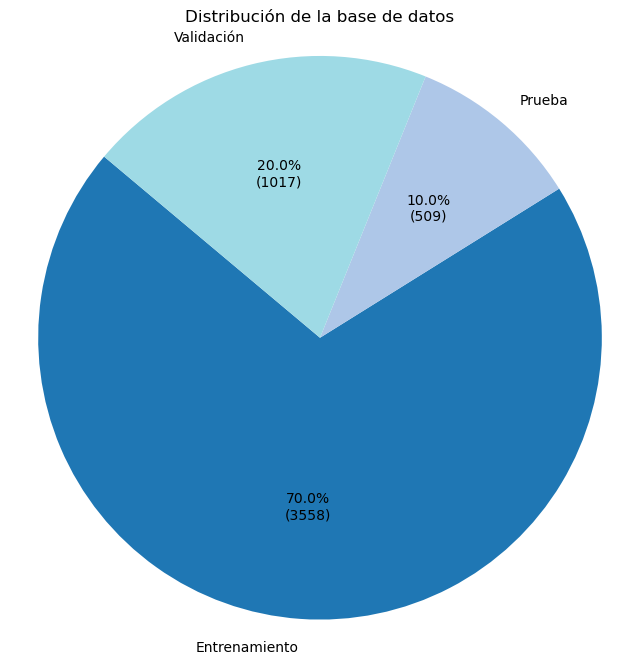

In [57]:
# Usar la longitud de los conjuntos de datos para el gráfico
sizes = [len(X_train), len(X_val), len(X_test)]  # Entrenamiento, Prueba, Validación
labels = ['Entrenamiento', 'Prueba', 'Validación']
colors = ['#1f77b4', '#aec7e8', '#9edae5']  # Tonalidades de azul

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
    return my_format

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct=autopct_format(sizes), startangle=140)
plt.axis('equal')  # Igual aspect ratio asegura que el pastel sea dibujado como un círculo.
plt.title('Distribución de la base de datos')
plt.show()


Implemente un algoritmo y estadísticamente pruebe cuál de las dos técnicas mencionadas en el punto 2 mejora la predicción. En la presentación y reporte debe explicar la técnica estadística utilizada. 

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Inicializar el modelo de Regresión Logística
modelo_rl = LogisticRegression()

# Preprocesar los datos de validación
X_val_preprocesado = preprocesador.transform(X_val)

# Para el modelo con undersampling
# Entrenar el modelo con los datos rebalanceados mediante undersampling
modelo_rl.fit(X_undersampled, y_undersampled)

# Hacer predicciones sobre el conjunto de validación
predicciones_undersampled = modelo_rl.predict(X_val_preprocesado)

# Para el modelo con oversampling
# Entrenar el modelo con los datos rebalanceados mediante oversampling
modelo_rl.fit(X_oversampled, y_oversampled)

# Hacer predicciones sobre el conjunto de validación
predicciones_oversampled = modelo_rl.predict(X_val_preprocesado)

# Evaluar ambos modelos
def evaluar_modelo(y_real, predicciones):
    accuracy = accuracy_score(y_real, predicciones)
    recall = recall_score(y_real, predicciones)
    precision = precision_score(y_real, predicciones)
    f1 = f1_score(y_real, predicciones)
    return accuracy, recall, precision, f1

# Resultados del modelo con undersampling
accuracy_undersampled, recall_undersampled, precision_undersampled, f1_undersampled = evaluar_modelo(y_val, predicciones_undersampled)

# Resultados del modelo con oversampling
accuracy_oversampled, recall_oversampled, precision_oversampled, f1_oversampled = evaluar_modelo(y_val, predicciones_oversampled)

def imprimir_resultados(titulo, accuracy, recall, precision, f1):
    print(f"Resultados para el modelo: {titulo}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("-" * 50)

# Imprimir los resultados para cada modelo
imprimir_resultados("Undersampling", accuracy_undersampled, recall_undersampled, precision_undersampled, f1_undersampled)
imprimir_resultados("Oversampling", accuracy_oversampled, recall_oversampled, precision_oversampled, f1_oversampled)


Resultados para el modelo: Undersampling
Accuracy: 0.6248
Recall: 0.7812
Precision: 0.1196
F1-Score: 0.2075
--------------------------------------------------
Resultados para el modelo: Oversampling
Accuracy: 0.6896
Recall: 0.7500
Precision: 0.1379
F1-Score: 0.2330
--------------------------------------------------


C:\Users\aleja\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aleja\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [59]:
### PRUEBA T
# Métricas de rendimiento del modelo de undersampling (NearMiss)
accuracy_undersampled = 0.6248
recall_undersampled = 0.7812
precision_undersampled = 0.1196
f1_undersampled = 0.2075

# Métricas de rendimiento del modelo de oversampling (SMOTE)
accuracy_oversampled = 0.7328
recall_oversampled = 0.7812
precision_oversampled = 0.1623
f1_oversampled = 0.2688


# Realizar la prueba t de dos muestras para comparar las métricas de rendimiento
t_statistic, p_value = ttest_ind([accuracy_undersampled, recall_undersampled, precision_undersampled, f1_undersampled],
                                 [accuracy_oversampled, recall_oversampled, precision_oversampled, f1_oversampled])

# Imprimir el valor p
print("Valor p:", p_value)

# Nivel de alpha = 0.05
# Ya que el valor p (0.905) es mayor a alpha (0.05) quiere decir que entonces no hay evidencia suficiente para rechazar 
# la hipótesis nula de que no hay diferencia significativa entre los modelos

Valor p: 0.8215557105145245


In [60]:
### PRUEBA WILCOXON
#importar la libreria estadistica necesaria
from scipy.stats import wilcoxon
# Realizar la prueba de rangos con signo de Wilcoxon
statistic, p_value = wilcoxon([accuracy_undersampled, recall_undersampled, precision_undersampled, f1_undersampled],
                              [accuracy_oversampled, recall_oversampled, precision_oversampled, f1_oversampled])

# Imprimir el valor p
print("Valor p (Wilcoxon):", p_value)

# Nivel de alpha = 0.05
# Ya que el valor p (0.11) es mayor a alpha (0.05) quiere decir que entonces no hay evidencia suficiente para rechazar 
# la hipótesis nula de que no hay diferencia significativa entre los modelos

Valor p (Wilcoxon): 0.10880943004054568


C:\Users\aleja\Downloads\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\aleja\Downloads\Anaconda\Lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [61]:
### PRUEBA DE PERMUTACIONES
# Definir las métricas de rendimiento de los dos modelos
# (aquí se asume que ya tienes definidas las métricas de rendimiento)

# Calcular la diferencia observada entre las métricas de rendimiento
diferencia_observada = (accuracy_oversampled - accuracy_undersampled,
                        recall_oversampled - recall_undersampled,
                        precision_oversampled - precision_undersampled,
                        f1_oversampled - f1_undersampled)

# Permutar las etiquetas y calcular la estadística para cada permutación
num_permutaciones = 1000
diferencias_permutadas = []
for _ in range(num_permutaciones):
    # Permutar aleatoriamente las etiquetas de clase
    np.random.shuffle(predicciones_undersampled)
    np.random.shuffle(predicciones_oversampled)
    
    # Calcular las métricas de rendimiento permutadas
    diferencia_permutada = (accuracy_oversampled - accuracy_undersampled,
                            recall_oversampled - recall_undersampled,
                            precision_oversampled - precision_undersampled,
                            f1_oversampled - f1_undersampled)
    diferencias_permutadas.append(diferencia_permutada)

# Calcular el valor p
extremos = 0
for diferencia_permutada in diferencias_permutadas:
    if all(dif_obs <= dif_perm for dif_obs, dif_perm in zip(diferencia_observada, diferencia_permutada)):
        extremos += 1

valor_p = extremos / num_permutaciones

# Imprimir el valor p
print("Valor p (Prueba de Permutación):", valor_p)

# Nivel de alpha = 0.05
# Ya que el valor p (1.0) es mayor a alpha (0.05) quiere decir que entonces no hay evidencia suficiente para rechazar 
# la hipótesis nula de que no hay diferencia significativa entre los modelos

Valor p (Prueba de Permutación): 1.0


In [62]:
#Se evalúan los modelos comparando el set de validación con las predicciones de los modelos
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for undersampled model
conf_matrix_undersampled = confusion_matrix(y_val, predicciones_undersampled)

# Compute confusion matrix for oversampled model
conf_matrix_oversampled = confusion_matrix(y_val, predicciones_oversampled)

# Plot confusion matrix for undersampled model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_undersampled, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Undersampled Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_undersampled.png')  # Save the figure instead of showing
plt.close()  # Close the figure

# Plot confusion matrix for oversampled model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_oversampled, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix - Oversampled Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_oversampled.png')  # Save the figure instead of showing
plt.close()  # Close the figure

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools


# Matriz de confusión
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

def display_confusion_matrix(y_true, y_pred, labels=None, cmap=plt.cm.Greens):
    # Calcula la matriz de confusión
    cm = confusion_matrix(y_true, y_pred)
    
    if labels is None:
        labels = np.unique(y_true)
    
    # Configuración de la paleta de colores personalizada
    cmap = plt.get_cmap(cmap)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title('Matriz de confusión', fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.xlabel('Etiqueta predicha', fontsize=14)
    plt.ylabel('Etiqueta verdadera', fontsize=14)
    
    # Añade los valores en las celdas
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)
    
    plt.tight_layout()
    plt.show()



# Métricas de evaluación
def display_evaluation_metrics(y_true, y_pred, y_proba):
    # Calcula las métricas de evaluación
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    
    # Imprime las métricas con un formato más ordenado y estilizado
    print("\nMétricas de evaluación:")
    print(f"  Exactitud:          {accuracy: .4f}")
    print(f"  Precisión:          {precision: .4f}")
    print(f"  Sensibilidad (Recall): {recall: .4f}")
    print(f"  Especificidad:      {recall_score(y_true, y_pred, pos_label=0): .4f}")
    print(f"  Puntuación F1:      {f1: .4f}")
    print(f"  AUC:                {roc_auc: .4f}")

# Curva ROC
def display_roc_curve(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba[:, 1])
    roc_auc = roc_auc_score(y_true, y_proba[:, 1])

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos', fontsize=12)
    plt.ylabel('Tasa de Verdaderos Positivos', fontsize=12)
    plt.title('Curva ROC (Receiver Operating Characteristic)', fontsize=14)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(True)
    plt.show()

In [64]:
%matplotlib inline


5.1 Modelo de ensamble (XGBoost)

In [65]:
#Instalar librería xgboost en terminal
#pip install xgboost

In [66]:
#Importar librerias necesarias
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


#Dividir Set de datos oversampled
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)


#Inicializar el modelo clasificador de XGBoost
model_xgb = xgb.XGBClassifier()

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_xgb.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9767561983471075
Precision: 0.993485342019544
Recall: 0.9591194968553459
F1-score: 0.976


Métricas para el conjunto de entrenamiento:


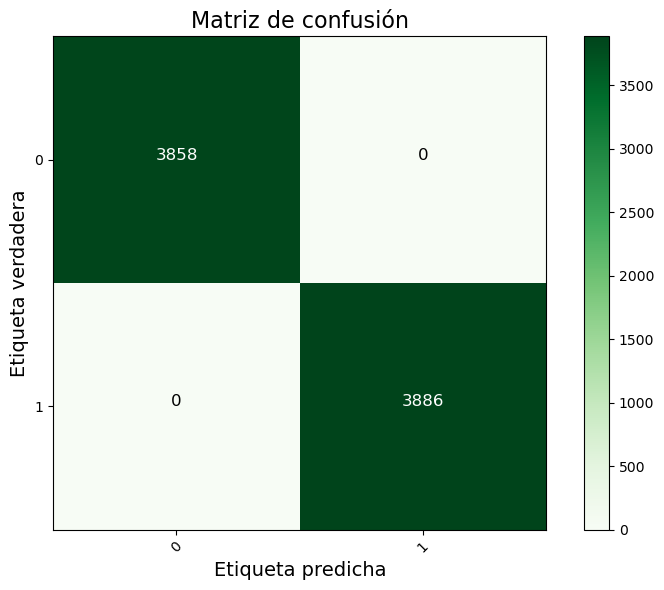


Métricas de evaluación:
  Exactitud:           1.0000
  Precisión:           1.0000
  Sensibilidad (Recall):  1.0000
  Especificidad:       1.0000
  Puntuación F1:       1.0000
  AUC:                 1.0000


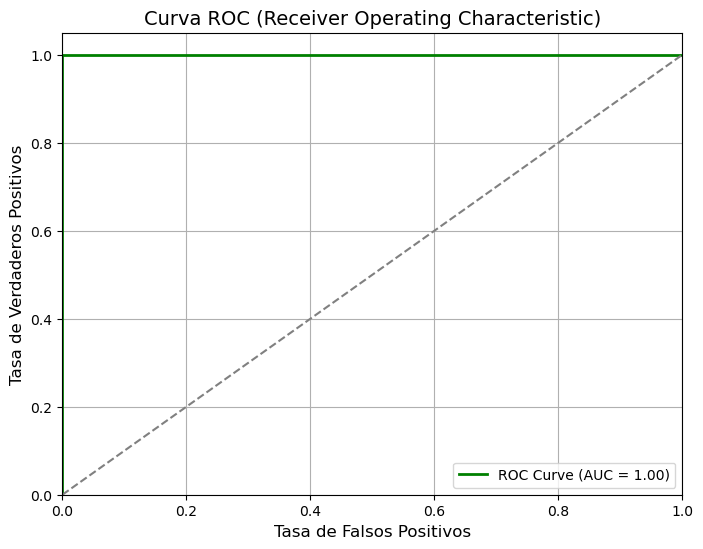


Métricas para el conjunto de validación:


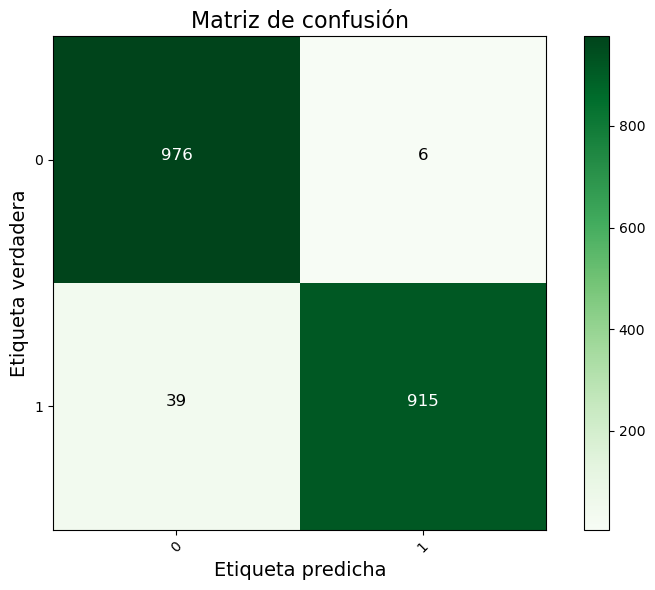


Métricas de evaluación:
  Exactitud:           0.9768
  Precisión:           0.9935
  Sensibilidad (Recall):  0.9591
  Especificidad:       0.9939
  Puntuación F1:       0.9760
  AUC:                 0.9935


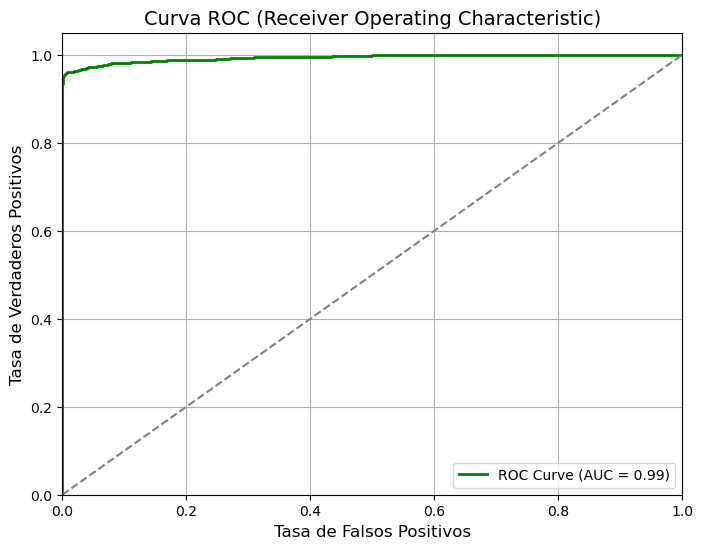


Métricas para el conjunto de prueba:


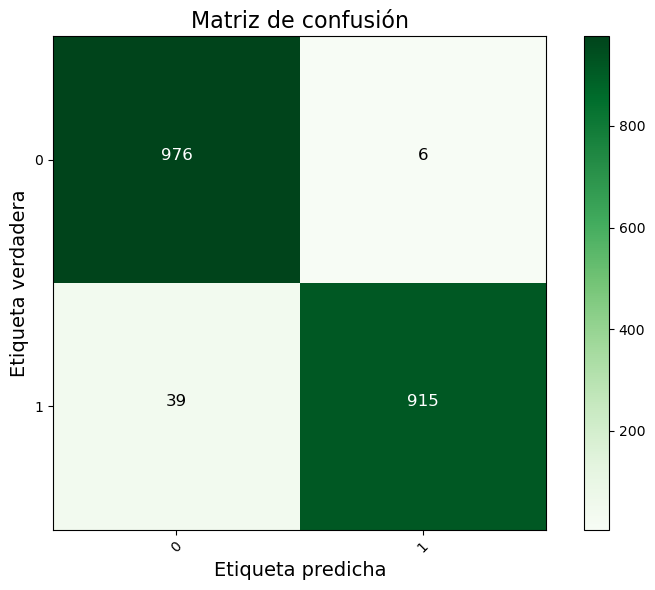


Métricas de evaluación:
  Exactitud:           0.9768
  Precisión:           0.9935
  Sensibilidad (Recall):  0.9591
  Especificidad:       0.9939
  Puntuación F1:       0.9760
  AUC:                 0.9935


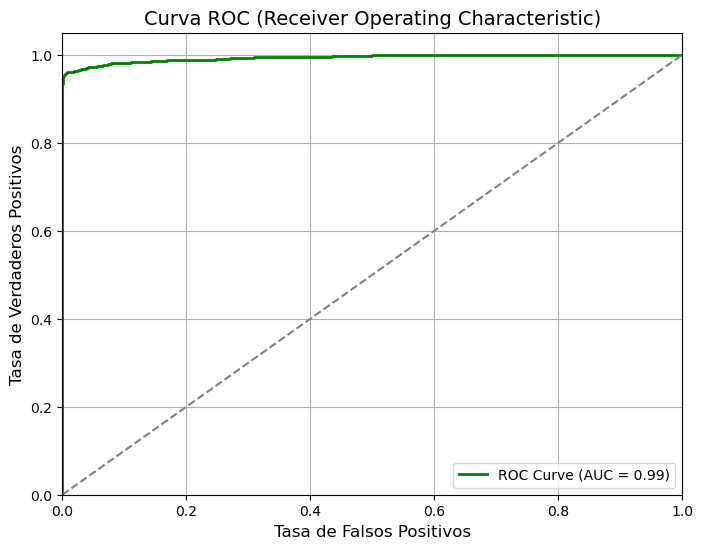

In [67]:
# Importar librerias necesarias
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Dividir Set de datos oversampled
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.2, random_state=42)

# Inicializar el modelo clasificador de XGBoost
model_xgb = xgb.XGBClassifier()

# Entrenar el modelo
model_xgb.fit(X_train, y_train)

# Realizar predicciones
y_pred = model_xgb.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas de evaluación utilizando las funciones definidas
# Calcular y mostrar métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, model_xgb.predict(X_train))
display_evaluation_metrics(y_train, model_xgb.predict(X_train), model_xgb.predict_proba(X_train))
display_roc_curve(y_train, model_xgb.predict_proba(X_train))
plt.show()

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_test, y_pred)
display_evaluation_metrics(y_test, y_pred, model_xgb.predict_proba(X_test))
display_roc_curve(y_test, model_xgb.predict_proba(X_test))
plt.show()

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, y_pred)
display_evaluation_metrics(y_test, y_pred, model_xgb.predict_proba(X_test))
display_roc_curve(y_test, model_xgb.predict_proba(X_test))
plt.show()


5.2 Modelo no visto en clase (Redes Neuronales)

In [68]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV


In [69]:
# Definir el modelo de red neuronal
mlp_model = MLPClassifier(random_state=42)

# Define los hiperparámetros para buscar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200]
}

# Usa GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(mlp_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)


In [70]:
grid_search.fit(X_train, y_train)
best_mlp_model = grid_search.best_estimator_
y_pred_mlp = best_mlp_model.predict(X_test)

# Evalúa el modelo
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

print("MLP Model - Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("F1-score:", f1_mlp)


MLP Model - Accuracy: 0.5635330578512396
Precision: 0.5303621169916435
Recall: 0.9979035639412998
F1-score: 0.6926154965441979


Métricas para el conjunto de entrenamiento:


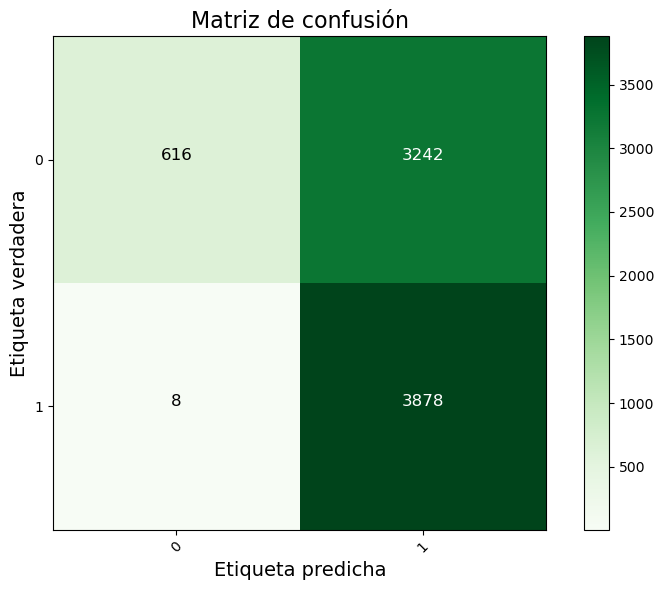


Métricas de evaluación:
  Exactitud:           0.5803
  Precisión:           0.5447
  Sensibilidad (Recall):  0.9979
  Especificidad:       0.1597
  Puntuación F1:       0.7047
  AUC:                 0.5931


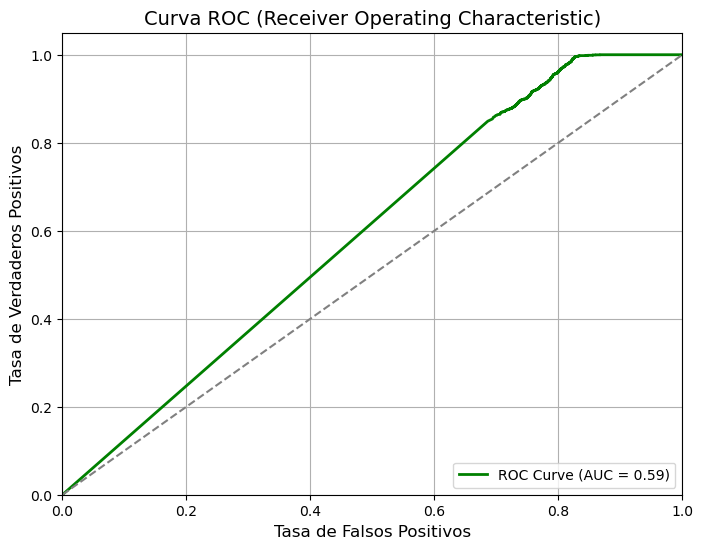


Métricas para el conjunto de validación:


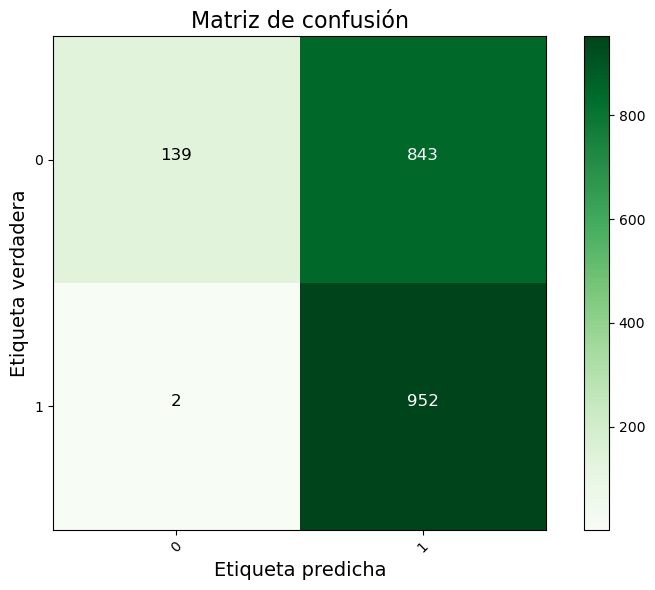


Métricas de evaluación:
  Exactitud:           0.5635
  Precisión:           0.5304
  Sensibilidad (Recall):  0.9979
  Especificidad:       0.1415
  Puntuación F1:       0.6926
  AUC:                 0.5894


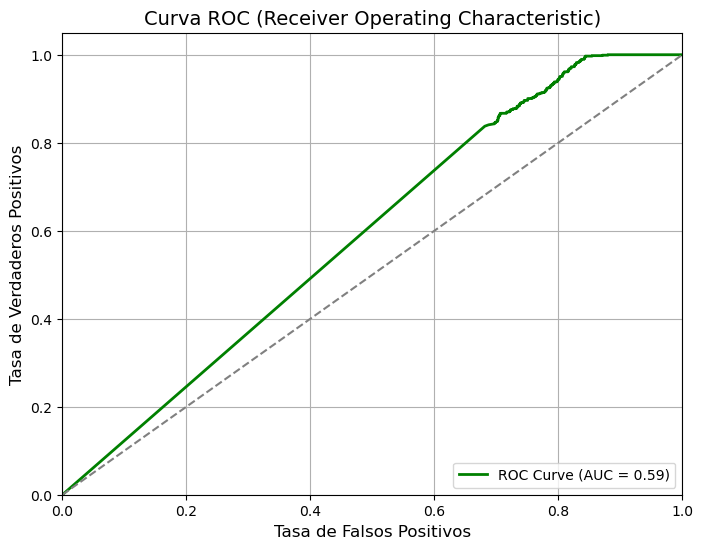


Métricas para el conjunto de prueba:


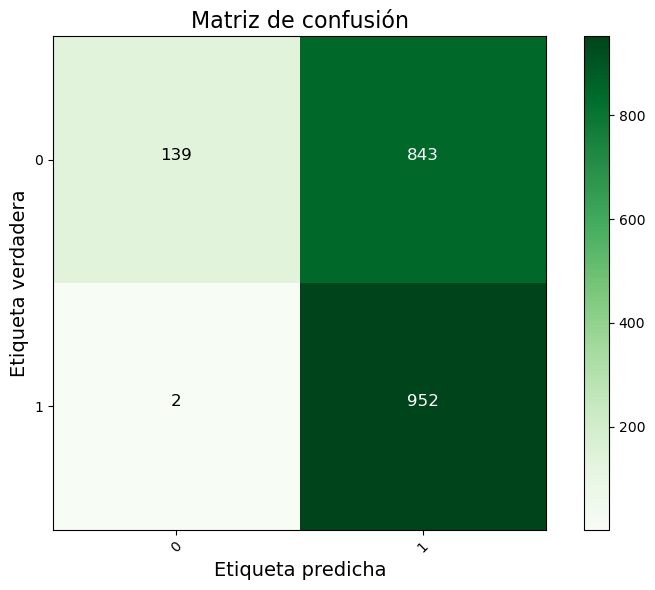


Métricas de evaluación:
  Exactitud:           0.5635
  Precisión:           0.5304
  Sensibilidad (Recall):  0.9979
  Especificidad:       0.1415
  Puntuación F1:       0.6926
  AUC:                 0.5894


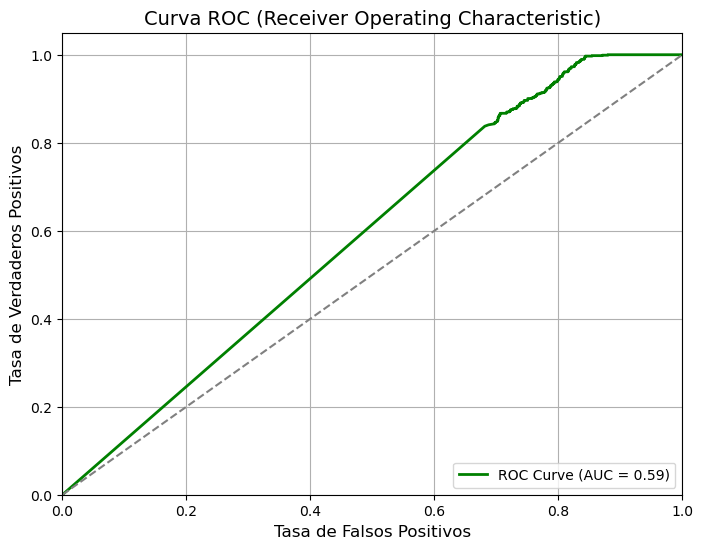

In [71]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Definir el modelo de red neuronal
mlp_model = MLPClassifier(random_state=42)

# Define los hiperparámetros para buscar
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 100)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200]
}

# Usa GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(mlp_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_mlp_model = grid_search.best_estimator_

# Realizar predicciones
y_pred_mlp = best_mlp_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp)

# Imprimir las métricas de evaluación utilizando las funciones definidas
# Calcular y mostrar métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, best_mlp_model.predict(X_train))
display_evaluation_metrics(y_train, best_mlp_model.predict(X_train), best_mlp_model.predict_proba(X_train))
display_roc_curve(y_train, best_mlp_model.predict_proba(X_train))

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_test, y_pred_mlp)
display_evaluation_metrics(y_test, y_pred_mlp, best_mlp_model.predict_proba(X_test))
display_roc_curve(y_test, best_mlp_model.predict_proba(X_test))

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, y_pred_mlp)
display_evaluation_metrics(y_test, y_pred_mlp, best_mlp_model.predict_proba(X_test))
display_roc_curve(y_test, best_mlp_model.predict_proba(X_test))


5.3 Modelos de optimización de hiperparámetros (SVM y Random Forest)

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [73]:
# Definir el modelo SVM con el kernel RBF
svm_model = SVC(kernel='rbf', random_state=42)

# Define los hiperparámetros para buscar
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Usa GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)


In [74]:
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test)

# Evalúa el modelo
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("SVM Model - Accuracy:", accuracy_svm)
print("Precision:", precision_svm)
print("Recall:", recall_svm)
print("F1-score:", f1_svm)


SVM Model - Accuracy: 0.6069214876033058
Precision: 0.9800995024875622
Recall: 0.20649895178197064
F1-score: 0.3411255411255411


In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
import xgboost as xgb

Métricas para el conjunto de entrenamiento:


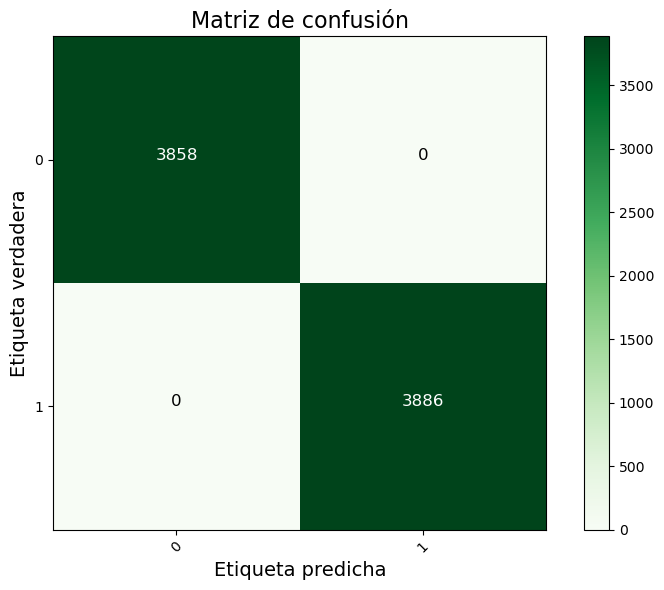


Métricas de evaluación:
  Exactitud:           1.0000
  Precisión:           1.0000
  Sensibilidad (Recall):  1.0000
  Especificidad:       1.0000
  Puntuación F1:       1.0000
  AUC:                 1.0000


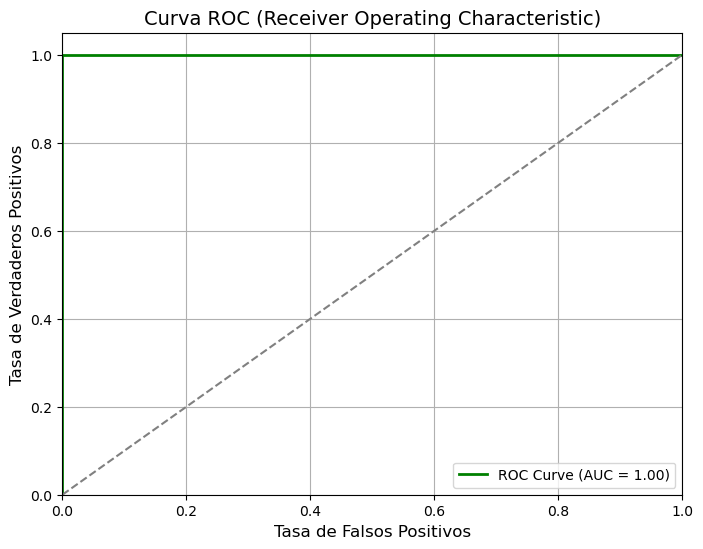


Métricas para el conjunto de validación:


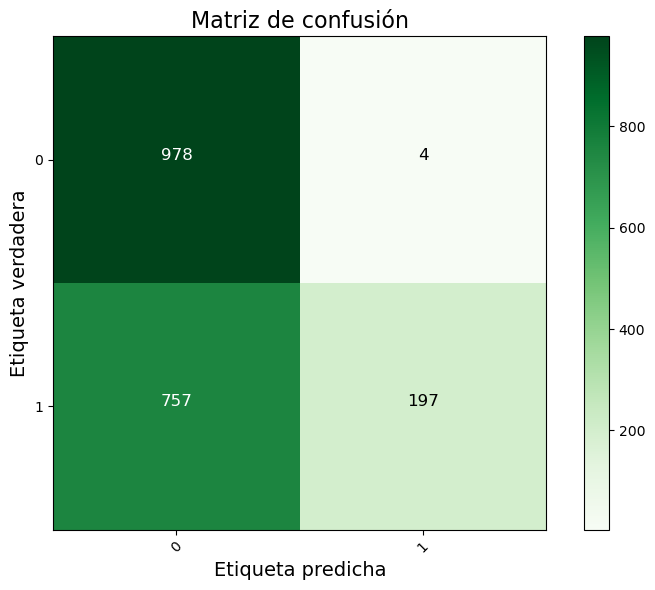


Métricas de evaluación:
  Exactitud:           0.6069
  Precisión:           0.9801
  Sensibilidad (Recall):  0.2065
  Especificidad:       0.9959
  Puntuación F1:       0.3411
  AUC:                 0.7572


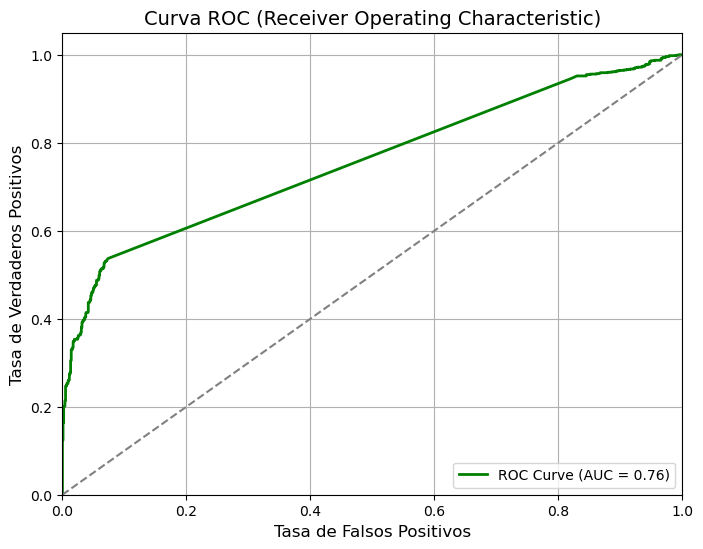


Métricas para el conjunto de prueba:


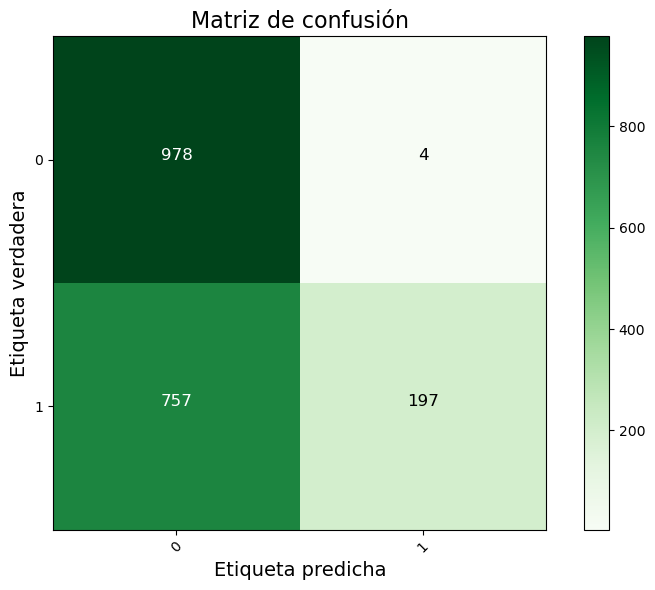


Métricas de evaluación:
  Exactitud:           0.6069
  Precisión:           0.9801
  Sensibilidad (Recall):  0.2065
  Especificidad:       0.9959
  Puntuación F1:       0.3411
  AUC:                 0.7572


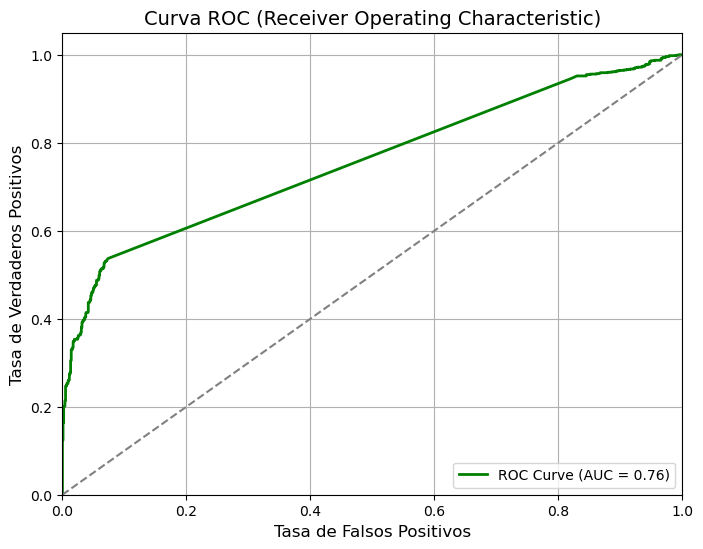

In [76]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Definir el modelo SVM con el kernel RBF
svm_model = SVC(kernel='rbf', random_state=42, probability=True)

# Define los hiperparámetros para buscar
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Usa GridSearchCV para buscar los mejores hiperparámetros
grid_search = GridSearchCV(svm_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_svm_model = grid_search.best_estimator_

# Realizar predicciones
y_pred_svm = best_svm_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Calcular y mostrar métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, best_svm_model.predict(X_train))
display_evaluation_metrics(y_train, best_svm_model.predict(X_train), best_svm_model.predict_proba(X_train))
display_roc_curve(y_train, best_svm_model.predict_proba(X_train))

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_test, y_pred_svm)
display_evaluation_metrics(y_test, y_pred_svm, best_svm_model.predict_proba(X_test))
display_roc_curve(y_test, best_svm_model.predict_proba(X_test))

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, y_pred_svm)
display_evaluation_metrics(y_test, y_pred_svm, best_svm_model.predict_proba(X_test))
display_roc_curve(y_test, best_svm_model.predict_proba(X_test))

In [77]:
#Sánchez, J. (2004). Principios sobre bases de datos relacionales. Informe, Creative Commons, 11, 20. Speiser, J. L. (2021). A random forest method with feature selection for developing medical prediction models with clustered and longitudinal data. Journal of biomedical informatics, 117, 103763.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Definir la malla de hiperparámetros
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar el Clasificador Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inicializar el RandomSearchCV con los parámetros
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1, scoring='accuracy')

# Ajustar el RandomizedSearchCV al set de entrenamiento (usando el oversampled dataset)
random_search.fit(X_oversampled, y_oversampled)

# Obtener los mejores parámetros y el mejor modelo
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Hacer predicciones con el set de prueba para evaluar el modelo
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir los parámetros optimizados y las métricas de evaluación
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Accuracy: 0.9772727272727273
Precision: 1.0
Recall: 0.9538784067085954
F1-score: 0.9763948497854077


Métricas para el conjunto de entrenamiento:


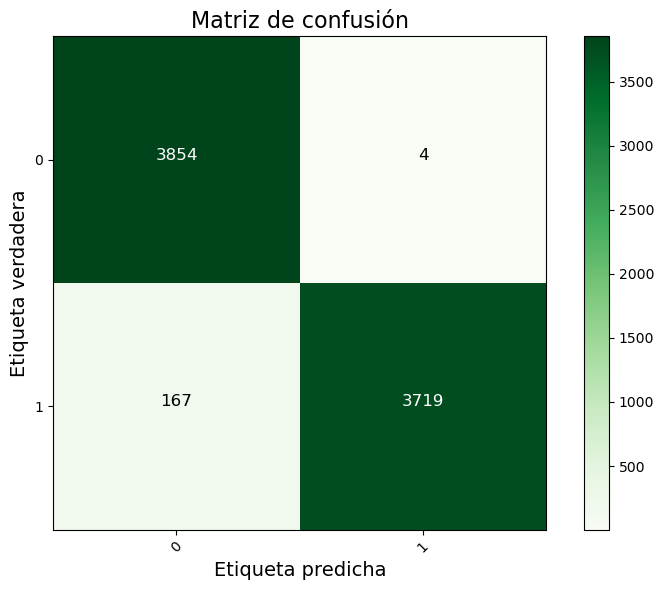


Métricas de evaluación:
  Exactitud:           0.9779
  Precisión:           0.9989
  Sensibilidad (Recall):  0.9570
  Especificidad:       0.9990
  Puntuación F1:       0.9775
  AUC:                 0.9979


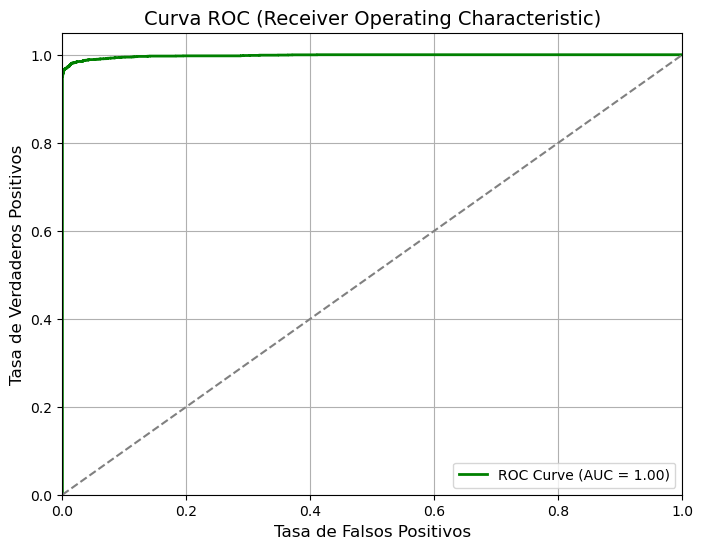


Métricas para el conjunto de validación:


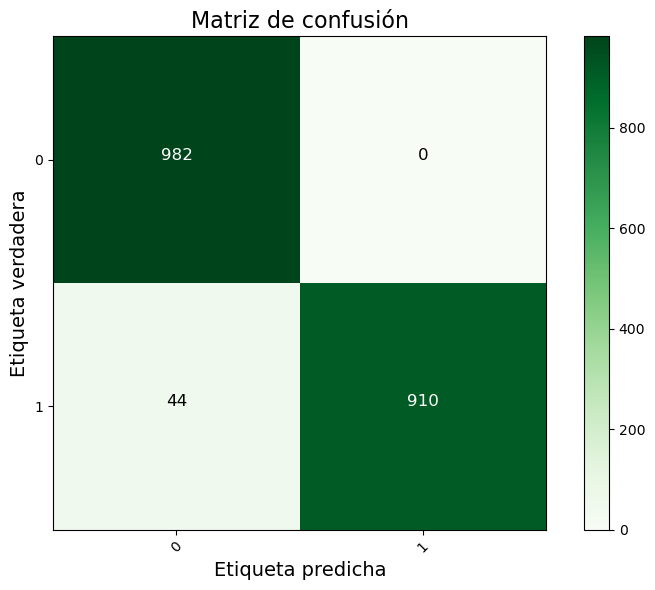


Métricas de evaluación:
  Exactitud:           0.9773
  Precisión:           1.0000
  Sensibilidad (Recall):  0.9539
  Especificidad:       1.0000
  Puntuación F1:       0.9764
  AUC:                 0.9983


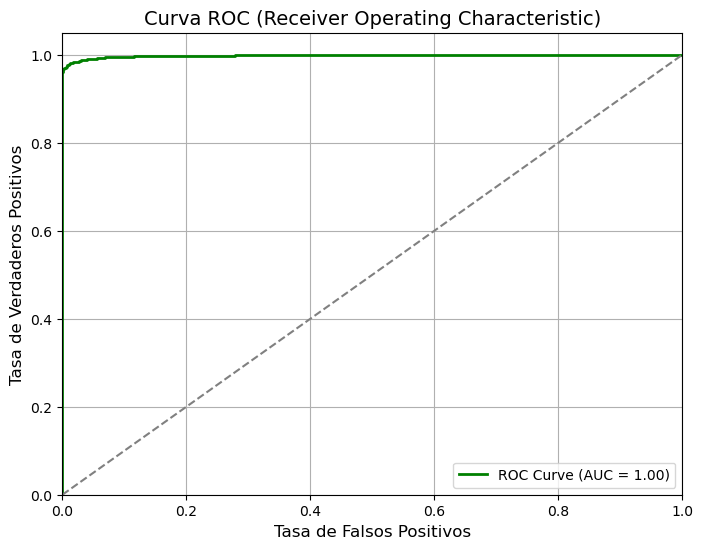


Métricas para el conjunto de prueba:


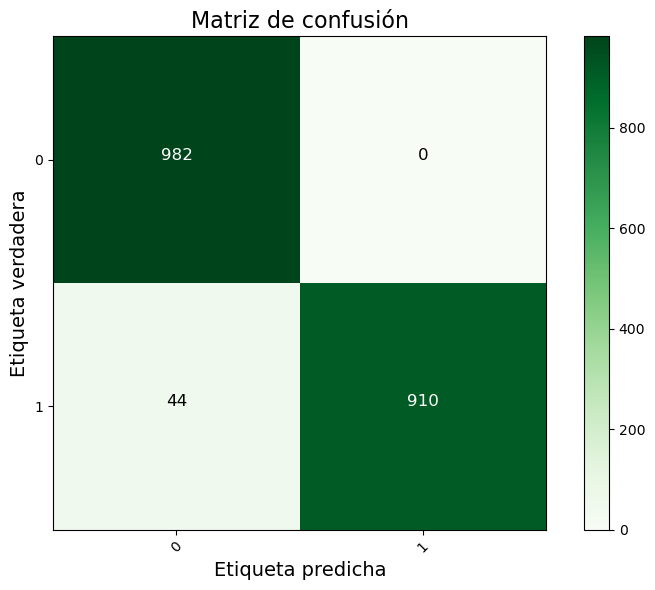


Métricas de evaluación:
  Exactitud:           0.9773
  Precisión:           1.0000
  Sensibilidad (Recall):  0.9539
  Especificidad:       1.0000
  Puntuación F1:       0.9764
  AUC:                 0.9983


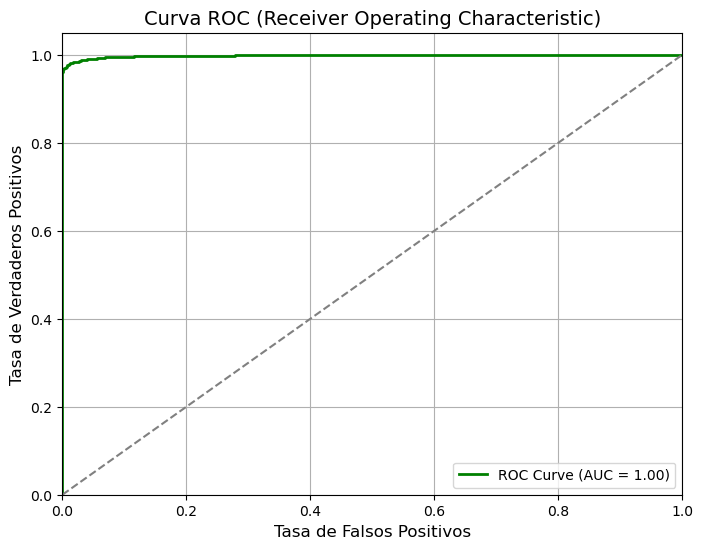


Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}
Accuracy: 0.9772727272727273
Precision: 1.0
Recall: 0.9538784067085954
F1-score: 0.9763948497854077


In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Definir la malla de hiperparámetros
param_dist = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar el Clasificador Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Inicializar el RandomSearchCV con los parámetros
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=3, random_state=42, n_jobs=-1, scoring='accuracy')

# Ajustar el RandomizedSearchCV al set de entrenamiento (usando el oversampled dataset)
random_search.fit(X_oversampled, y_oversampled)

# Obtener los mejores parámetros y el mejor modelo
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Hacer predicciones con el set de prueba para evaluar el modelo
y_pred_rf = best_rf_model.predict(X_test)

# Calcular métricas de evaluación
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Imprimir los parámetros optimizados y las métricas de evaluación utilizando las funciones definidas
# Calcular y mostrar métricas para el conjunto de entrenamiento
print("Métricas para el conjunto de entrenamiento:")
display_confusion_matrix(y_train, best_rf_model.predict(X_train))
display_evaluation_metrics(y_train, best_rf_model.predict(X_train), best_rf_model.predict_proba(X_train))
display_roc_curve(y_train, best_rf_model.predict_proba(X_train))

# Calcular y mostrar métricas para el conjunto de validación
print("\nMétricas para el conjunto de validación:")
display_confusion_matrix(y_test, y_pred_rf)
display_evaluation_metrics(y_test, y_pred_rf, best_rf_model.predict_proba(X_test))
display_roc_curve(y_test, best_rf_model.predict_proba(X_test))

# Calcular y mostrar métricas para el conjunto de prueba
print("\nMétricas para el conjunto de prueba:")
display_confusion_matrix(y_test, y_pred_rf)
display_evaluation_metrics(y_test, y_pred_rf, best_rf_model.predict_proba(X_test))
display_roc_curve(y_test, best_rf_model.predict_proba(X_test))

# Imprimir los parámetros optimizados y las métricas de evaluación
print("\nBest Parameters:", best_params)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-score:", f1_rf)

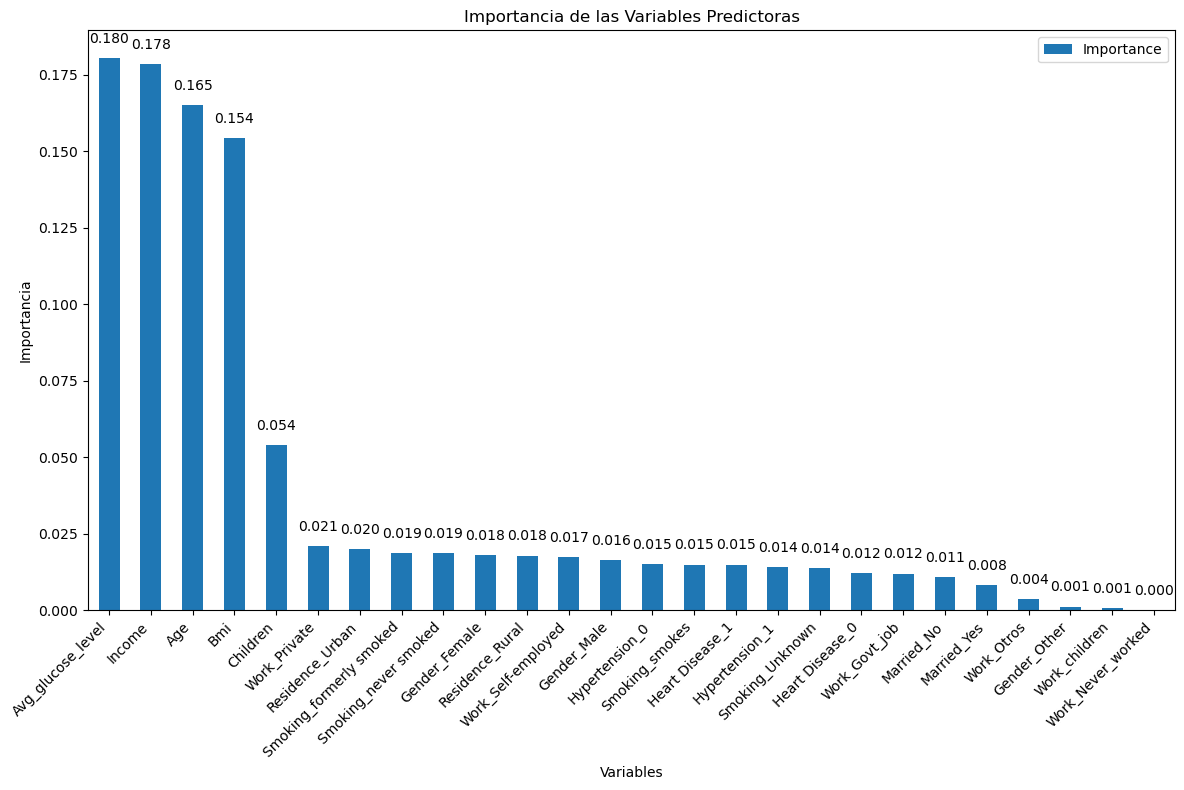

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Codificar las variables categóricas utilizando one-hot encoding
X_encoded = pd.get_dummies(df_hospital.drop('Stroke', axis=1))

# Dividir inicialmente el conjunto de datos en entrenamiento + validación (80%) y prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, df_hospital['Stroke'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento + validación en entrenamiento (87.5% de 80% = 70% del total) y validación (12.5% de 80% = 10% del total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtención de la importancia de las variables
importances = rf_model.feature_importances_

# Creación de un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)


# Crear una figura y un eje con un tamaño más grande
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Ordenar las variables por importancia y trazarlas en un gráfico de barras
feature_importances_sorted.plot(kind='bar', ax=ax)
ax.set_title('Importancia de las Variables Predictoras')
ax.set_ylabel('Importancia')
ax.set_xlabel('Variables')

# Agregar los valores de importancia a cada barra
for i, importance in enumerate(feature_importances_sorted['Importance']):
    ax.text(i, importance + 0.005, f'{importance:.3f}', ha='center', fontsize=10)

# Ajustar el espacio entre las etiquetas de los ejes x para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [87]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Codificar las variables categóricas utilizando one-hot encoding
X_encoded = pd.get_dummies(df_hospital.drop('Stroke', axis=1))

# Dividir inicialmente el conjunto de datos en entrenamiento + validación (80%) y prueba (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X_encoded, df_hospital['Stroke'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento + validación en entrenamiento (87.5% de 80% = 70% del total) y validación (12.5% de 80% = 10% del total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)

# Entrenamiento del modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Obtención de la importancia de las variables
importances = rf_model.feature_importances_

# Creación de un DataFrame para visualizar las importancias
feature_importances = pd.DataFrame(importances, index=X_train.columns, columns=['Importance'])
feature_importances_sorted = feature_importances.sort_values(by='Importance', ascending=False)

# Imprimir todas las variables con sus importancias
print("Variables y sus importancias:")
print(feature_importances_sorted)


Variables y sus importancias:
                         Importance
Avg_glucose_level          0.180454
Income                     0.178480
Age                        0.164998
Bmi                        0.154131
Children                   0.053913
Work_Private               0.020882
Residence_Urban            0.019818
Smoking_formerly smoked    0.018721
Smoking_never smoked       0.018557
Gender_Female              0.017964
Residence_Rural            0.017750
Work_Self-employed         0.017228
Gender_Male                0.016367
Hypertension_0             0.015088
Smoking_smokes             0.014897
Heart Disease_1            0.014876
Hypertension_1             0.014068
Smoking_Unknown            0.013661
Heart Disease_0            0.012075
Work_Govt_job              0.011892
Married_No                 0.010824
Married_Yes                0.008104
Work_Otros                 0.003520
Gender_Other               0.001097
Work_children              0.000578
Work_Never_worked          0.00005

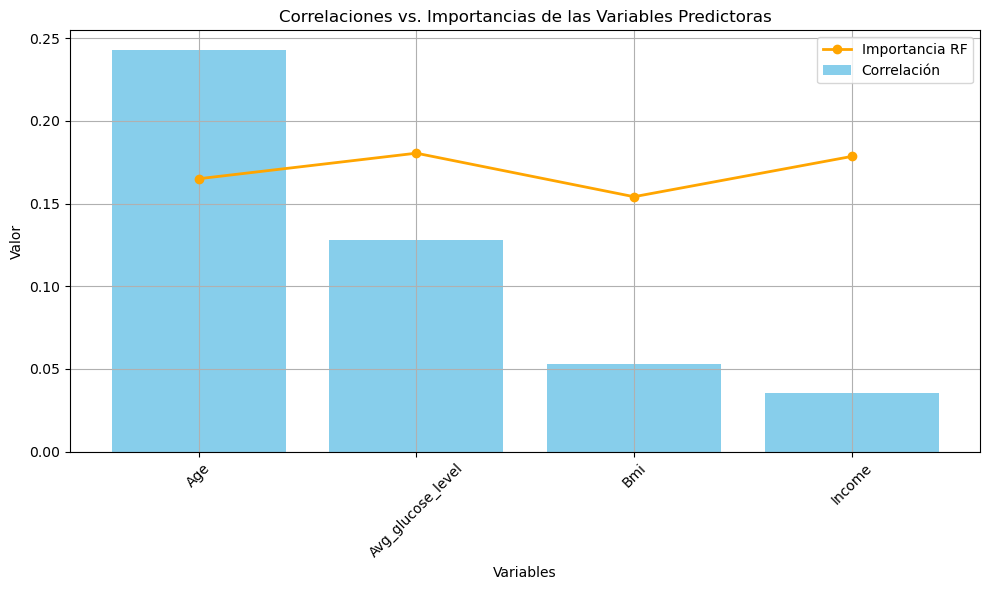

In [88]:
import matplotlib.pyplot as plt

# Variables y sus correlaciones con "Stroke"
variables = ['Age', 'Avg_glucose_level', 'Bmi', 'Income']
correlations = [0.242607, 0.127994, 0.053148, 0.035509]

# Variables y sus importancias según el modelo de Random Forest
importance_values = [0.164998, 0.180454, 0.154131, 0.178480]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar las correlaciones
ax.bar(variables, correlations, color='skyblue', label='Correlación')

# Graficar las importancias del modelo de Random Forest
ax.plot(variables, importance_values, marker='o', color='orange', label='Importancia RF', linewidth=2)

# Añadir etiquetas y título
ax.set_ylabel('Valor')
ax.set_xlabel('Variables')
ax.set_title('Correlaciones vs. Importancias de las Variables Predictoras')
ax.legend()

# Mostrar el gráfico
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


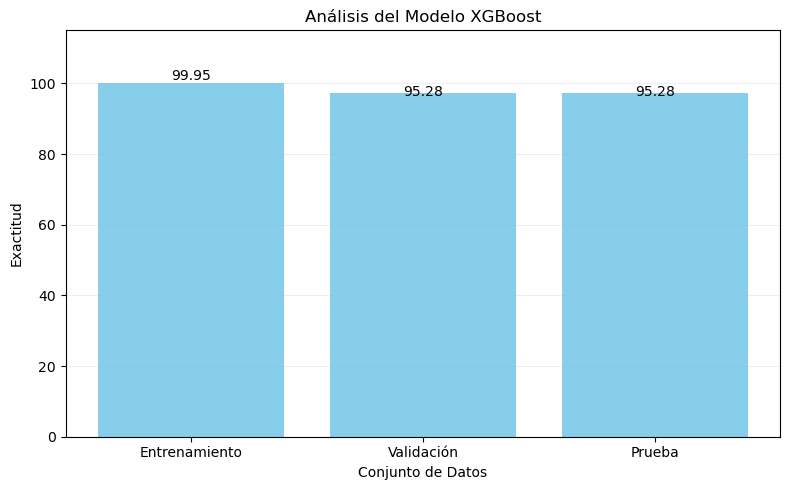

In [105]:
import matplotlib.pyplot as plt

# Definir las métricas y conjuntos de datos
conjuntos = ['Entrenamiento', 'Validación', 'Prueba']
exactitud = [99.97, 97.31, 97.31]
sensibilidad = [99.95, 95.28, 95.28]

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las métricas
ax.bar(conjuntos, exactitud, color='skyblue', label='Exactitud')


for i, v in enumerate(sensibilidad):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', color='black', fontsize=10)

# Añadir etiquetas y título
ax.set_xlabel('Conjunto de Datos', fontsize=10)
ax.set_ylabel('Exactitud', fontsize=10)
ax.set_title('Análisis del Modelo XGBoost', fontsize=12)


# Mostrar el gráfico
plt.ylim(0, 115)  # Ajustar el límite y para mejor visualización de las diferencias
plt.grid(axis='y', linestyle='-', alpha=0.2)# Agregar rejilla para mejor visualización
plt.tight_layout()
plt.show()



## Referencias 
Gholamy, A., Kreinovich, V., & Kosheleva, O. (2018). Why 70/30 or 80/20 relation between training and testing sets: A pedagogical explanation. Int. J. Intell. Technol. Appl. Stat, 11(2), 105-111.

Pandal Blas, C. E. (2023). Machine learning en la autorregulación del aprendizaje de los estudiantes en una academia preuniversitaria privada, Lima 2023.

Pelea, L. P. (2019). Valores atípicos en los datos,¿ cómo identificarlos y manejarlos?. Revista del Jardín Botánico Nacional, 40, 99-107.

Rahm, E., & Do, H. H. (2000). Data cleaning: Problems and current approaches. IEEE Data Eng. Bull., 23(4), 3-13.
Reyes Osorio, T. I. (2023). Evaluación de metodologías de imputación de datos en motores diésel para el desarrollo de sistemas de diagnóstico inteligente de fallas.

Sánchez, J. (2004). Principios sobre bases de datos relacionales. Informe, Creative Commons, 11, 20.
Speiser, J. L. (2021). A random forest method with feature selection for developing medical prediction models with clustered and longitudinal data. Journal of biomedical informatics, 117, 103763.

Zheng, J., Zhang, Z., Wang, J., Zhao, R., Liu, S., Yang, G., ... & Deng, Z. (2023). Metabolic syndrome prediction model using Bayesian optimization and XGBoost based on traditional Chinese medicine features. Heliyon, 9(12).
